# Import Libraries

Here we import all the libraries needed for loading, processing, and visualizing the dataset

In [3]:
# Import the needed libraries
import kagglehub
import os
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
# Needed for some non-Seaborn-based enhancements
from scipy.stats import gaussian_kde
# Principal Component Analysis
from sklearn.decomposition import PCA

# About the Dataset
---

This dataset consists of data collected as part of a research project involving 30 volunteers. These volunteers wore a mobile phone and performed some specific actions. The data from the mobile phone was collected and used to analyze rotation, velocity, and other interesting calculations.

The experiments have been carried out with a group of 30 volunteers within an age bracket of 19-48 years. Each person performed six activities (WALKING, WALKING_UPSTAIRS, WALKING_DOWNSTAIRS, SITTING, STANDING, LAYING) wearing a smartphone (Samsung Galaxy S II) at the waist. Using its embedded accelerometer and gyroscope, we captured 3-axial linear acceleration and 3-axial angular velocity at a constant rate of 50 Hz. The experiments have been video-recorded to label the data manually. The obtained dataset has been randomly partitioned into two sets, where 70% of the volunteers were selected for generating the training data and 30% for the test data. 

The sensor signals (accelerometer and gyroscope) were pre-processed by applying noise filters and then sampled in fixed-width sliding windows of 2.56 sec and 50% overlap (128 readings/window). The sensor acceleration signal, which has gravitational and body motion components, was separated using a Butterworth low-pass filter into body acceleration and gravity. The gravitational force is assumed to have only low-frequency components; therefore, a filter with a 0.3 Hz cutoff frequency was used. From each window, a vector of features was obtained by calculating variables from the time and frequency domains.

These details are specified in the 'features_info.txt' file, which describes the labels in the 'features.txt'. 

*Interesting Calculations*:

Subsequently, the body linear acceleration and angular velocity were derived in time to obtain Jerk signals (tBodyAccJerk-XYZ and tBodyGyroJerk-XYZ). Also, the magnitude of these three-dimensional signals was calculated using the Euclidean norm (tBodyAccMag, tGravityAccMag, tBodyAccJerkMag, tBodyGyroMag, tBodyGyroJerkMag). 

Finally, a Fast Fourier Transform (FFT) was applied to some of these signals, producing fBodyAcc-XYZ, fBodyAccJerk-XYZ, fBodyGyro-XYZ, fBodyAccJerkMag, fBodyGyroMag, fBodyGyroJerkMag. (Note the 'f' to indicate frequency domain signals). 

# Load the Libraries from text files

We know the data is already partitioned into a training set and a test set:

*The obtained dataset has been randomly partitioned into two sets, where 70% of the volunteers were selected for generating the training data and 30% for the test data.*

First, we will load the train data and test data, then merge them along with the Activity Names.

## For each record, the following is provided:
---

- Triaxial acceleration from the accelerometer (total acceleration) and the estimated body acceleration.
- Triaxial Angular velocity from the gyroscope. 
- A 561-feature vector with time and frequency domain variables. 
- Its activity label. 
- An identifier of the subject who experimented.

## Load the Train data from text files

We know the data is already partitioned into a training set and a test set, so we just load the training data set directly.

In [14]:
# Folder where the Dataset was extracted
# I skipped putting the zip extraction into Jupyter, as it was inefficient
extract_folder = 'UCI_HAR_Dataset'

In [16]:
# Load feature names
# Ensure we use a raw separator
features = pd.read_csv(f"{extract_folder}/features.txt", 
                       sep=r'\s+', header=None, names=['index', 'feature'])
feature_names = features['feature'].tolist()

# Load training data
# Ensure we use a raw separator
X_train = pd.read_csv(f"{extract_folder}/train/X_train.txt", 
                      sep=r'\s+', header=None)
X_train.columns = feature_names  # apply the duplicate names after loading

y_train = pd.read_csv(f"{extract_folder}/train/y_train.txt", 
                      sep=r'\s+', header=None, names=['Activity'])

# Load the subjects vector
subject_train = pd.read_csv(f"{extract_folder}/train/subject_train.txt", 
                            sep=r'\s+', header=None, names=['Subject'])

# Combine training data
train_df = pd.concat([subject_train, y_train, X_train], axis=1)

# Output train data info and samples
print(train_df.info())
print(train_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 563 entries, Subject to angle(Z,gravityMean)
dtypes: float64(561), int64(2)
memory usage: 31.6 MB
None
   Subject  Activity  tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
0        1         5           0.288585          -0.020294          -0.132905   
1        1         5           0.278419          -0.016411          -0.123520   
2        1         5           0.279653          -0.019467          -0.113462   
3        1         5           0.279174          -0.026201          -0.123283   
4        1         5           0.276629          -0.016570          -0.115362   

   tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
0         -0.995279         -0.983111         -0.913526         -0.995112   
1         -0.998245         -0.975300         -0.960322         -0.998807   
2         -0.995380         -0.967187         -0.978944         -0.996520   
3         -0.996091

## Load the Test data from text files

We know the data is already partitioned into a training set and a test set, so we just load the test data set directly, then we concatenate both the training and test data into a single DataFrame.

In [20]:
# Load test data
# Ensure we use a raw separator
X_test = pd.read_csv(f"{extract_folder}/test/X_test.txt", 
                     sep=r'\s+', header=None)
X_test.columns = feature_names

y_test = pd.read_csv(f"{extract_folder}/test/y_test.txt", 
                     sep=r'\s+', header=None, names=['Activity'])

# Load the subjects vector
subject_test = pd.read_csv(f"{extract_folder}/test/subject_test.txt", 
                           sep=r'\s+', header=None, names=['Subject'])

# Combine test data
test_df = pd.concat([subject_test, y_test, X_test], axis=1)

# Combine train and test datasets
full_df = pd.concat([train_df, test_df], ignore_index=True)

# Output data info and samples
print(full_df.info())
print(full_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10299 entries, 0 to 10298
Columns: 563 entries, Subject to angle(Z,gravityMean)
dtypes: float64(561), int64(2)
memory usage: 44.2 MB
None
   Subject  Activity  tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
0        1         5           0.288585          -0.020294          -0.132905   
1        1         5           0.278419          -0.016411          -0.123520   
2        1         5           0.279653          -0.019467          -0.113462   
3        1         5           0.279174          -0.026201          -0.123283   
4        1         5           0.276629          -0.016570          -0.115362   

   tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
0         -0.995279         -0.983111         -0.913526         -0.995112   
1         -0.998245         -0.975300         -0.960322         -0.998807   
2         -0.995380         -0.967187         -0.978944         -0.996520   
3         -0.9960

## Merge the Activities and their Names

We load the labels from the 'activities_labels.txt' file, and then merge those labels into the full training DataFrame.

In [22]:
# Load activity labels
activity_labels = pd.read_csv(f"{extract_folder}/activity_labels.txt", 
                              sep=r'\s+', header=None, names=['Activity', 'ActivityName'])

# Map numeric labels to names
full_df = full_df.merge(activity_labels, on='Activity')

# Output data info and samples
print(full_df.info())
print(full_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10299 entries, 0 to 10298
Columns: 564 entries, Subject to ActivityName
dtypes: float64(561), int64(2), object(1)
memory usage: 44.3+ MB
None
   Subject  Activity  tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
0        1         5           0.288585          -0.020294          -0.132905   
1        1         5           0.278419          -0.016411          -0.123520   
2        1         5           0.279653          -0.019467          -0.113462   
3        1         5           0.279174          -0.026201          -0.123283   
4        1         5           0.276629          -0.016570          -0.115362   

   tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
0         -0.995279         -0.983111         -0.913526         -0.995112   
1         -0.998245         -0.975300         -0.960322         -0.998807   
2         -0.995380         -0.967187         -0.978944         -0.996520   
3         -0.

# Global Visualization Settings

In [276]:
# Set global font to Times New Roman and size to 14
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 14

# Visualize Covariance

This will limit the covariance representations to accelerometer features or gyroscopic features.
Without this limitation, the number of features to consider would be too numerous

## Feature reduction

Configure the features to limit for covariance visualization

In [269]:
# Gyroscopic features
gyro_features = [
    'tBodyGyro-mean()-X', 'tBodyGyro-mean()-Y', 'tBodyGyro-mean()-Z',
    'tBodyGyroJerk-mean()-X', 'tBodyGyroJerk-mean()-Y', 'tBodyGyroJerk-mean()-Z',
    'fBodyGyro-mean()-X', 'fBodyGyro-mean()-Y', 'fBodyGyro-mean()-Z'
]

# Accelerometer features
accel_features = [
    'tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
    'tGravityAcc-mean()-X', 'tGravityAcc-mean()-Y', 'tGravityAcc-mean()-Z',
    'tBodyAccJerk-mean()-X', 'tBodyAccJerk-mean()-Y', 'tBodyAccJerk-mean()-Z',
]

## Accelerometer Covariance
---

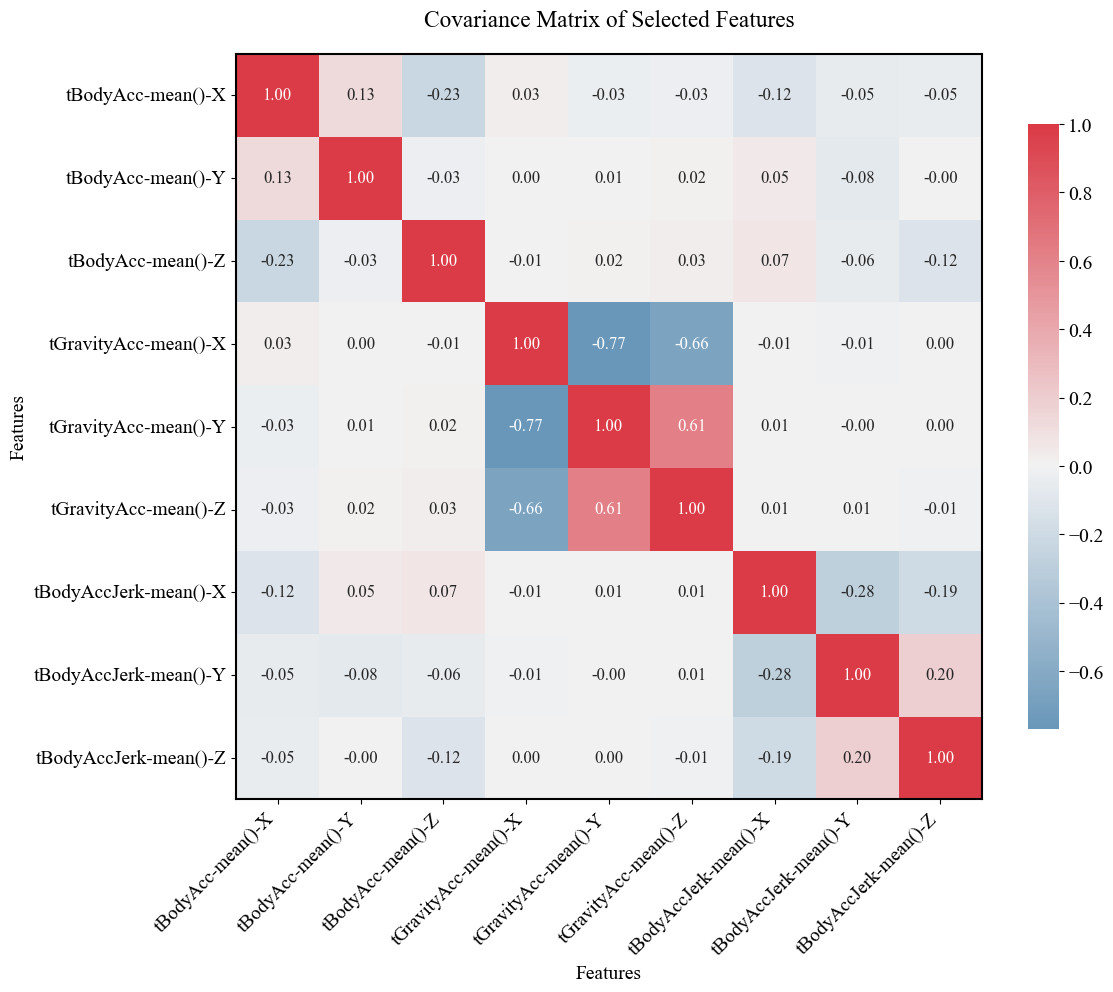

In [282]:
# Create a subset DataFrame
feature_df = full_df[accel_features].copy()

# Standardize the data
scaler = StandardScaler()
X_standardized = scaler.fit_transform(feature_df)

# Compute covariance matrix
cov_matrix = np.cov(X_standardized, rowvar=False)

# Create the heatmap visualization
plt.figure(figsize=(12, 10))

# Create custom diverging colormap (blue-white-red)
custom_cmap = sns.diverging_palette(240, 10, as_cmap=True)

# Plot heatmap with annotation
ax = sns.heatmap(
    cov_matrix,
    annot=True,
    fmt=".2f",
    cmap=custom_cmap,
    center=0,
    square=True,
    cbar_kws={'shrink': 0.8},
    annot_kws={'size': 12},
    xticklabels=accel_features,
    yticklabels=accel_features
)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Add titles and labels
plt.title("Covariance Matrix of Selected Features", pad=20)
plt.xlabel("Features")
plt.ylabel("Features")

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Add border for visual polish
for _, spine in ax.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(1.5)

# Save as a high-quality image
plt.savefig('lab5-JoshuaSummers-covariance_matrix_accelerometer.png', dpi=300, bbox_inches='tight')

# Show the visualization
plt.show()

## Gyroscopic Covariance
---

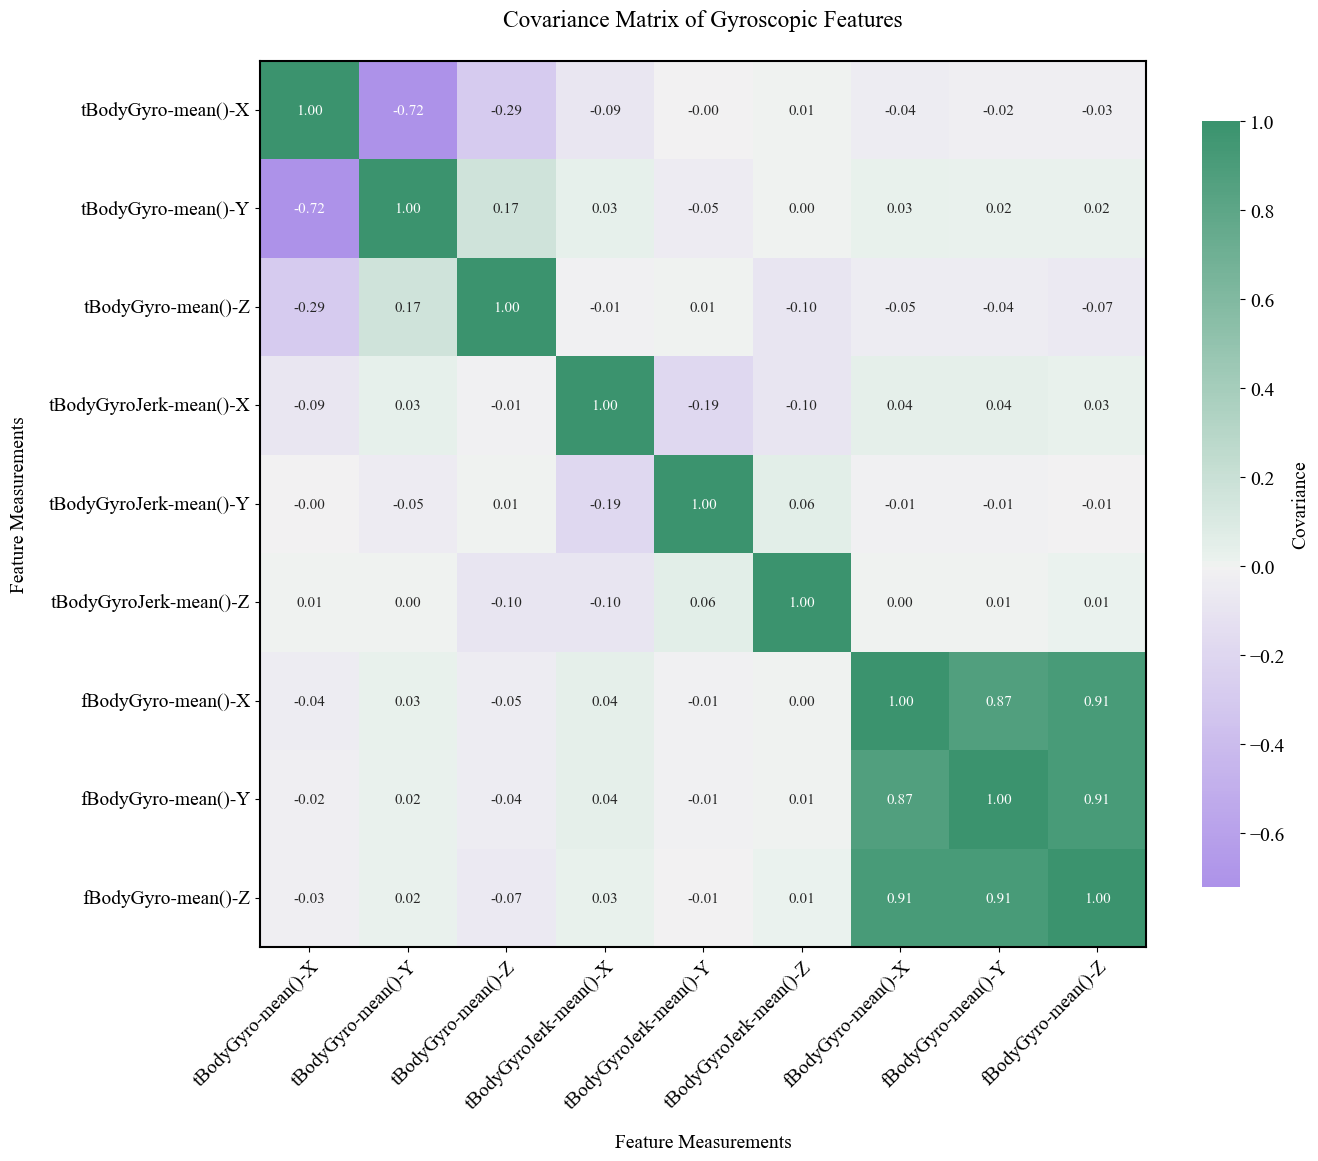

In [148]:
# Create gyroscopic subset DataFrame
gyro_df = full_df[gyro_features].copy()

# Standardize the data
scaler = StandardScaler()
X_gyro_std = scaler.fit_transform(gyro_df)

# Compute covariance matrix
gyro_cov = np.cov(X_standardized, rowvar=False)

# Create the heatmap visualization
plt.figure(figsize=(14, 12))  # Larger size for more features

# Create purple-green diverging colormap (appropriate for gyroscopic data)
gyro_cmap = sns.diverging_palette(275, 150, s=80, l=55, as_cmap=True)

# Plot heatmap with annotation
ax = sns.heatmap(
    gyro_cov,
    annot=True,
    fmt=".2f",
    cmap=gyro_cmap,
    center=0,
    square=True,
    cbar_kws={'shrink': 0.8, 'label': 'Covariance'},
    annot_kws={'size': 11},  # Slightly smaller for more features
    xticklabels=gyro_features,
    yticklabels=gyro_features
)

# Rotate and adjust labels
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.yticks(rotation=0)

# Add titles and labels with padding
plt.title("Covariance Matrix of Gyroscopic Features", pad=25)
plt.xlabel("Feature Measurements", labelpad=15)
plt.ylabel("Feature Measurements", labelpad=15)

# Adjust layout
plt.tight_layout()

# Add border for visual polish
for _, spine in ax.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(1.5)

# Save high-quality version
plt.savefig('lab5-JoshuaSummers-covariance_matrix_gyroscopic.png', dpi=300, bbox_inches='tight', facecolor='white')

# Show the visualization
plt.show()

In [ ]:
# Gyroscopic features
gyro_features = [
    'tBodyGyro-mean()-X', 'tBodyGyro-mean()-Y', 'tBodyGyro-mean()-Z',
    'tBodyGyroJerk-mean()-X', 'tBodyGyroJerk-mean()-Y', 'tBodyGyroJerk-mean()-Z',
    'fBodyGyro-mean()-X', 'fBodyGyro-mean()-Y', 'fBodyGyro-mean()-Z'
]

# Accelerometer features
accel_features = [
    'tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
    'tGravityAcc-mean()-X', 'tGravityAcc-mean()-Y', 'tGravityAcc-mean()-Z',
    'tBodyAccJerk-mean()-X', 'tBodyAccJerk-mean()-Y', 'tBodyAccJerk-mean()-Z',
]


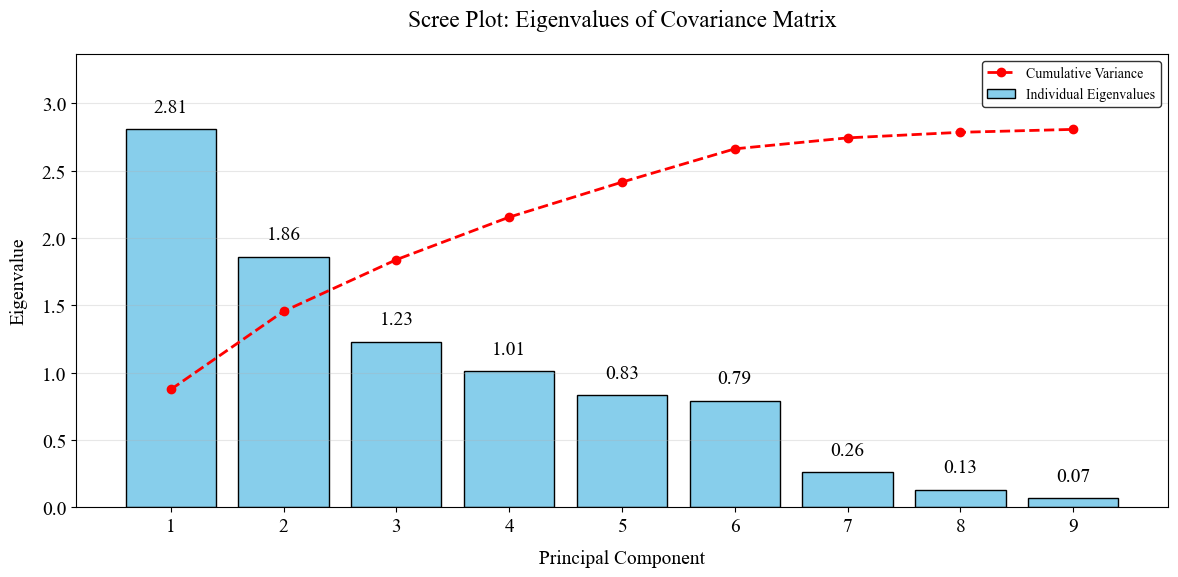

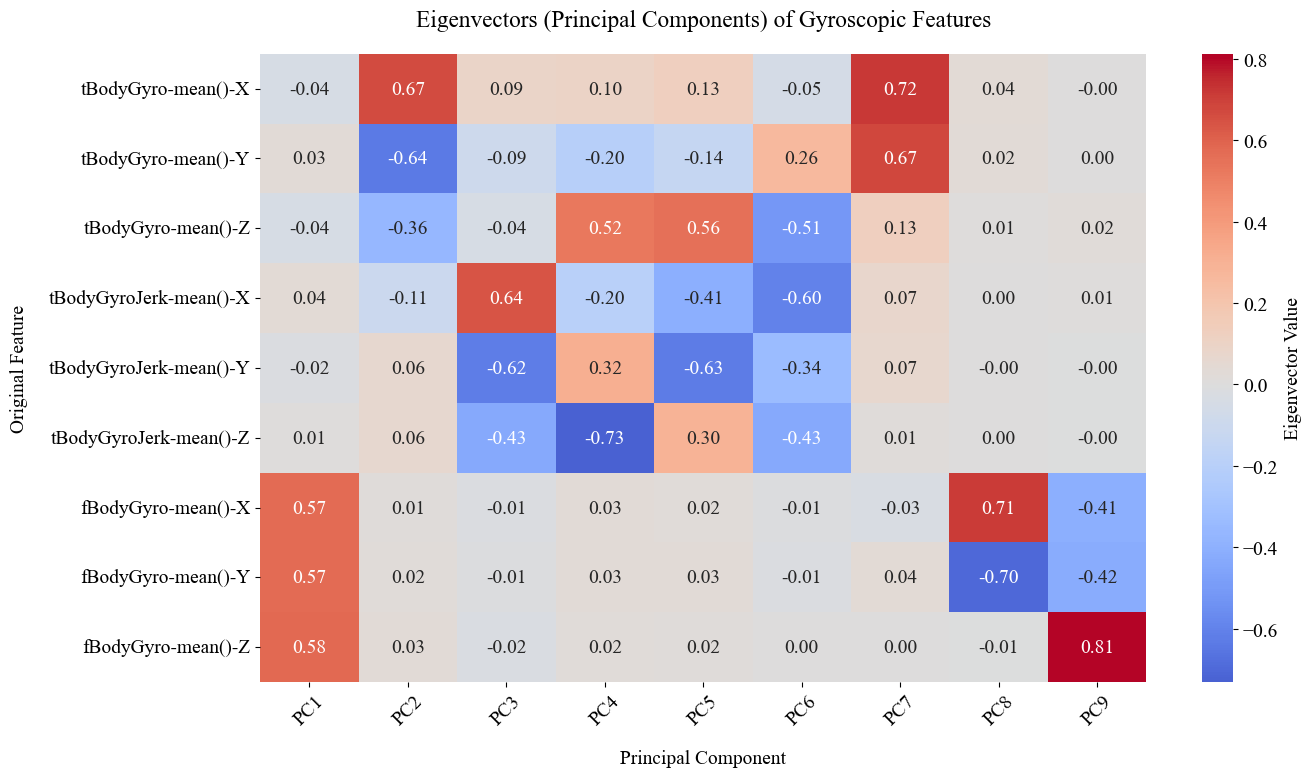

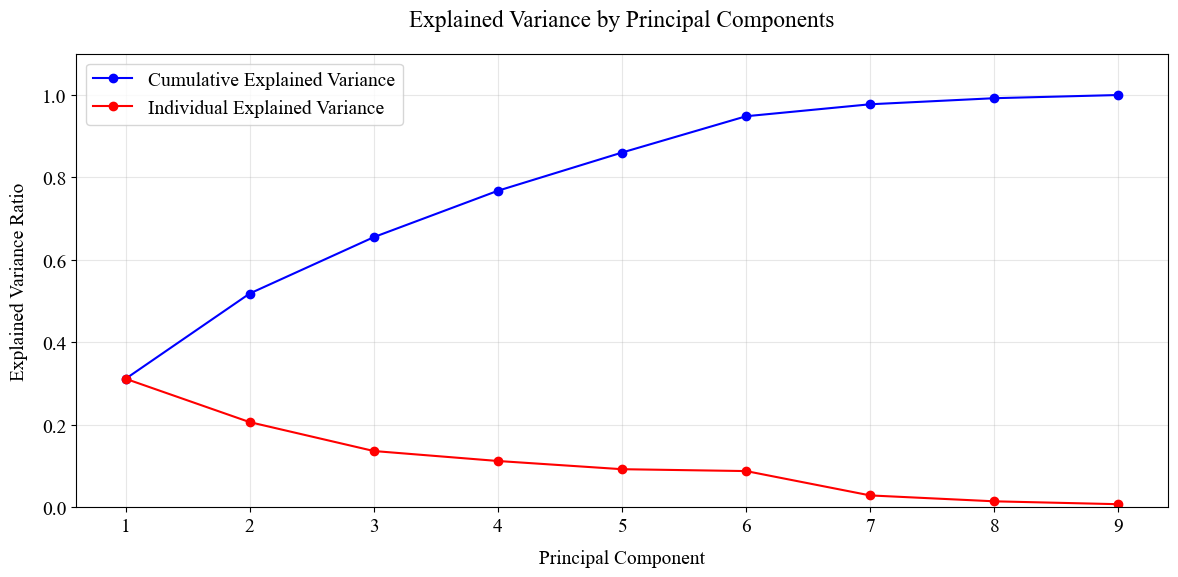


Eigenvalues and Explained Variance:


Eigenvalue  Explained Variance  Cumulative Variance
PC1      2.8072              0.3119               0.3119
PC2      1.8610              0.2068               0.5186
PC3      1.2304              0.1367               0.6553
PC4      1.0127              0.1125               0.7679
PC5      0.8335              0.0926               0.8605
PC6      0.7928              0.0881               0.9485
PC7      0.2612              0.0290               0.9775
PC8      0.1326              0.0147               0.9923
PC9      0.0695              0.0077               1.0000

In [190]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Set global font to Times New Roman
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 14

# Select features (using gyroscopic features as example)
selected_features = [
    'tBodyGyro-mean()-X', 'tBodyGyro-mean()-Y', 'tBodyGyro-mean()-Z',
    'tBodyGyroJerk-mean()-X', 'tBodyGyroJerk-mean()-Y', 'tBodyGyroJerk-mean()-Z',
    'fBodyGyro-mean()-X', 'fBodyGyro-mean()-Y', 'fBodyGyro-mean()-Z'
]

# Prepare data
X = full_df[selected_features].copy()
X_std = StandardScaler().fit_transform(X)

# Compute covariance matrix
cov_matrix = np.cov(X_std, rowvar=False)

# Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Sort eigenvalues and eigenvectors in descending order
sorted_idx = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_idx]
eigenvectors = eigenvectors[:, sorted_idx]

# Create a DataFrame for eigenvectors
eigenvector_df = pd.DataFrame(
    eigenvectors,
    columns=[f'PC{i+1}' for i in range(len(selected_features))],
    index=selected_features
)

# Seaborn bright palette
colors = sns.color_palette("bright", len(eigenvalues))

# =============================================
# Visualization 1: Eigenvalue Bar Chart
# =============================================
plt.figure(figsize=(12, 6))
bars = plt.bar(
    range(1, len(eigenvalues)+1),
    eigenvalues,
    color='skyblue',
    edgecolor='k',
    label='Individual Eigenvalues'
)

# Add cumulative line WITH LABEL
cumulative = np.cumsum(eigenvalues)/np.sum(eigenvalues)
line, = plt.plot(
    range(1, len(eigenvalues)+1),
    cumulative*max(eigenvalues),
    'ro--',
    linewidth=2,
    label='Cumulative Variance'
)

max_eigenvalue = max(eigenvalues) * 1.2  # Add 20% padding
plt.ylim(0, max_eigenvalue)

# Add values on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2.,
        height + 0.1,
        f'{height:.2f}',
        ha='center',
        va='bottom'
    )

plt.xlabel('Principal Component', labelpad=10)
plt.ylabel('Eigenvalue', labelpad=10)
plt.title('Scree Plot: Eigenvalues of Covariance Matrix', pad=20)
plt.xticks(range(1, len(eigenvalues)+1))
plt.grid(axis='y', alpha=0.3)
# Add legend
plt.legend(
    loc='upper right',
    frameon=True,
    edgecolor='black',
    prop={'family': 'Times New Roman', 'size': 12},
)
plt.tight_layout()
plt.savefig('eigenvalues.png', dpi=300, bbox_inches='tight')
plt.show()

# =============================================
# Visualization 2: Eigenvector Heatmap
# =============================================
plt.figure(figsize=(14, 8))
ax = sns.heatmap(
    eigenvector_df,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    center=0,
    cbar_kws={'label': 'Eigenvector Value'}
)

# Customize heatmap appearance
plt.title('Eigenvectors (Principal Components) of Gyroscopic Features', pad=20)
plt.xlabel('Principal Component', labelpad=15)
plt.ylabel('Original Feature', labelpad=15)
plt.xticks(rotation=45)
plt.yticks(rotation=0)

# Adjust layout and save
plt.tight_layout()
plt.savefig('eigenvectors_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

# =============================================
# Visualization 3: Explained Variance
# =============================================
explained_variance = eigenvalues / np.sum(eigenvalues)
cumulative_variance = np.cumsum(explained_variance)

plt.figure(figsize=(12, 6))
plt.plot(
    range(1, len(explained_variance)+1),
    cumulative_variance,
    'bo-',
    label='Cumulative Explained Variance'
)
plt.plot(
    range(1, len(explained_variance)+1),
    explained_variance,
    'ro-',
    label='Individual Explained Variance'
)

plt.xlabel('Principal Component', labelpad=10)
plt.ylabel('Explained Variance Ratio', labelpad=10)
plt.title('Explained Variance by Principal Components', pad=20)
plt.xticks(range(1, len(explained_variance)+1))
plt.legend(loc='best')
plt.grid(alpha=0.3)
plt.ylim(0, 1.1)
plt.tight_layout()
plt.savefig('explained_variance.png', dpi=300, bbox_inches='tight')
plt.show()

# =============================================
# Print Eigenvalue Table
# =============================================
print("\nEigenvalues and Explained Variance:")
eigenvalue_table = pd.DataFrame({
    'Eigenvalue': eigenvalues,
    'Explained Variance': explained_variance,
    'Cumulative Variance': cumulative_variance
}, index=[f'PC{i+1}' for i in range(len(eigenvalues))])
display(eigenvalue_table.round(4))

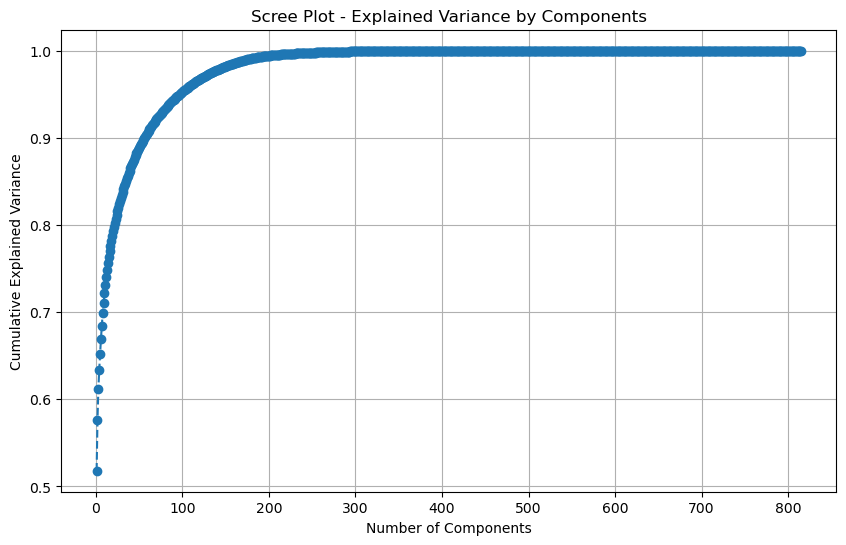

In [32]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_numeric)

# Perform PCA
pca = PCA()
pca.fit(X_scaled)

# Scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), 
         pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Scree Plot - Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()

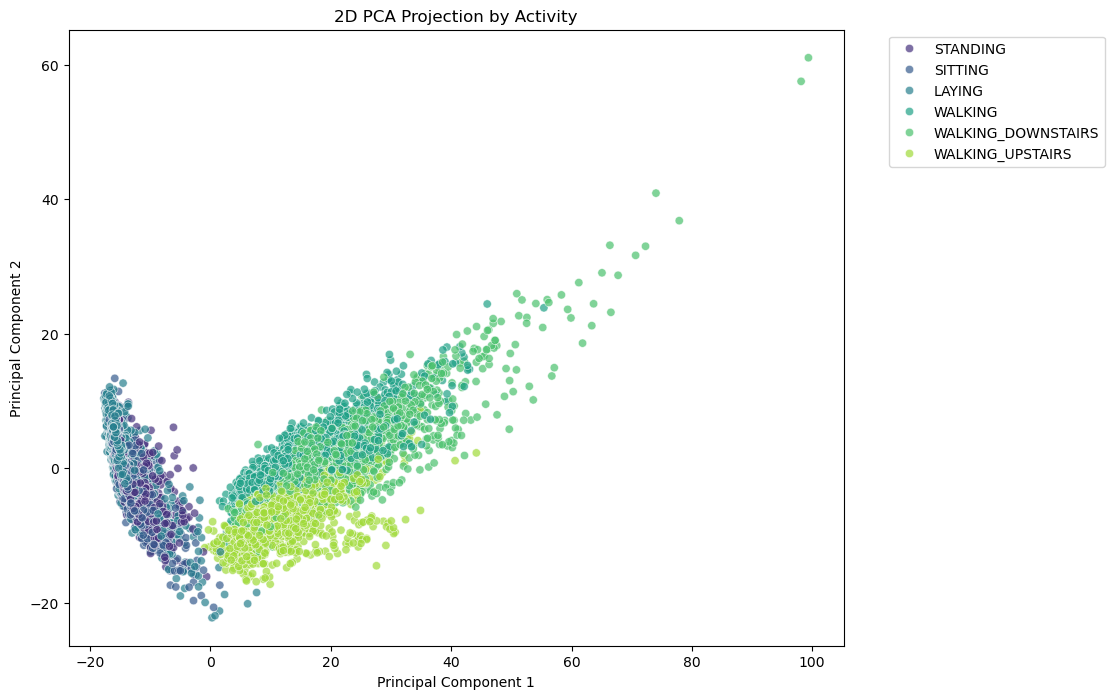

In [90]:
# Perform PCA with 2 components
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

# Plot
plt.figure(figsize=(10, 8))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], 
                hue=full_df['ActivityName'], palette='viridis', alpha=0.7)
plt.title('2D PCA Projection by Activity')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

/var/folders/b0/gfhb3q152fj7dx14t68p8cch0000gn/T/ipykernel_3290/2589642820.py:11: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



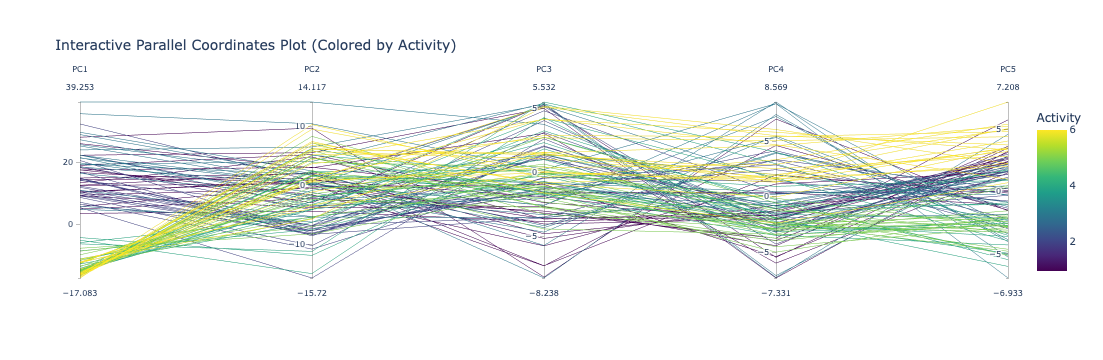

In [114]:
import plotly.express as px

# Perform PCA (first 5 components)
pca = PCA(n_components=5)
pca_result = pca.fit_transform(X_scaled)
pca_df = pd.DataFrame(data=pca_result, columns=[f'PC{i+1}' for i in range(5)])
pca_df['Activity'] = full_df['Activity']
pca_df['ActivityName'] = full_df['ActivityName']

# Sample for better performance (optional)
sample_df = pca_df.groupby('Activity').apply(lambda x: x.sample(20)).reset_index(drop=True)

# Create interactive parallel coordinates plot with Viridis coloring
fig = px.parallel_coordinates(
    sample_df,
    color='Activity',  # Color by activity
    dimensions=[f'PC{i+1}' for i in range(5)] + ['ActivityName'],
    color_continuous_scale='Viridis',  # Viridis color scale
    title='Interactive Parallel Coordinates Plot (Colored by Activity)'
)

# Customize layout
fig.update_layout(
    height=600,  # Increased height (default is 500)
    # width=1200,  # Optional: adjust width if needed
    plot_bgcolor='white',
    paper_bgcolor='white',
    font=dict(size=10)
)

# Show the plot
fig.show()

/var/folders/b0/gfhb3q152fj7dx14t68p8cch0000gn/T/ipykernel_3290/905999907.py:18: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



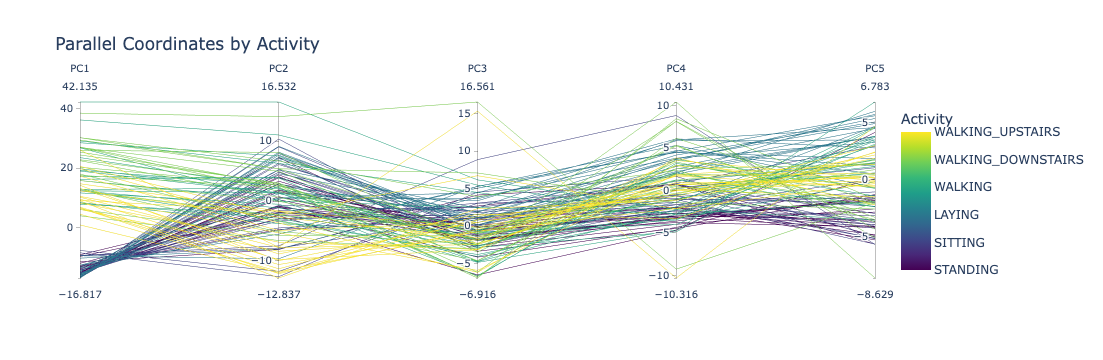

In [116]:
import plotly.express as px
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np

# Perform PCA (first 5 components)
pca = PCA(n_components=5)
pca_result = pca.fit_transform(X_scaled)
pca_df = pd.DataFrame(data=pca_result, columns=[f'PC{i+1}' for i in range(5)])
pca_df['ActivityName'] = full_df['ActivityName']

# Create numerical mapping for activities
activities = pca_df['ActivityName'].unique()
activity_ids = {name: i for i, name in enumerate(activities)}
pca_df['Activity_ID'] = pca_df['ActivityName'].map(activity_ids)

# Sample data (optional)
sample_df = pca_df.groupby('ActivityName').apply(lambda x: x.sample(20)).reset_index(drop=True)

# Create the plot using numerical IDs for coloring
fig = px.parallel_coordinates(
    sample_df,
    color='Activity_ID',
    dimensions=[f'PC{i+1}' for i in range(5)] + ['ActivityName'],
    color_continuous_scale='Viridis',
    title='Parallel Coordinates by Activity'
)

# Customize the colorbar to show activity names
fig.update_layout(
    coloraxis_colorbar=dict(
        title='Activity',
        tickvals=np.linspace(0, len(activities)-1, len(activities)),
        ticktext=activities
    ),
    height=800,
    plot_bgcolor='white',
    paper_bgcolor='white'
)

fig.show()

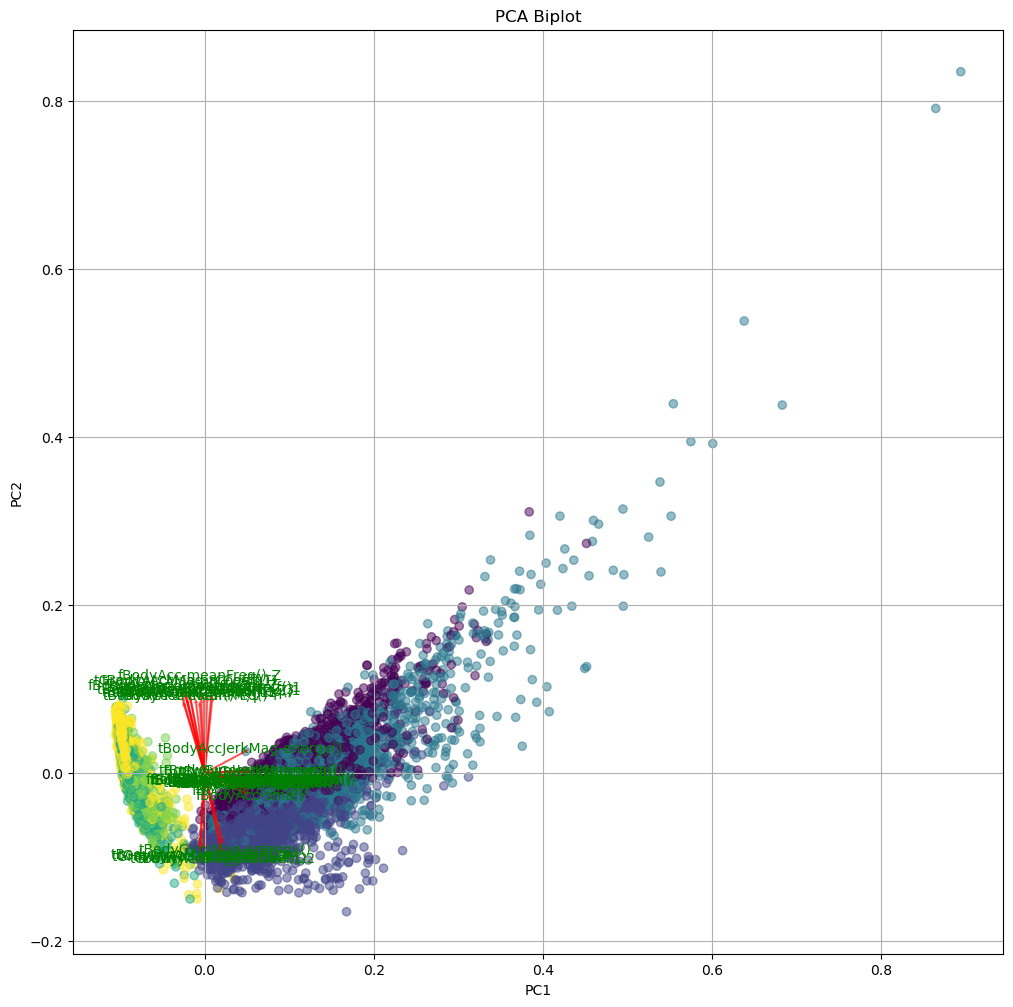

In [44]:
def biplot(score, coeff, labels=None):
    plt.figure(figsize=(12, 12))
    xs = score[:, 0]
    ys = score[:, 1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    
    # Plot scores
    plt.scatter(xs * scalex, ys * scaley, c=full_df['Activity'].astype('category').cat.codes, 
                cmap='viridis', alpha=0.5)
    
    # Plot arrows
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], color='r', alpha=0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, f"Var{i+1}", color='g', ha='center', va='center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color='g', ha='center', va='center')
    
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.grid()
    plt.title('PCA Biplot')

# Select top features for biplot (for clarity)
top_features = 20
feature_names = df_numeric.columns
pca = PCA(n_components=2)
pca.fit(X_scaled)

# Get the coefficients for the top features
coeff = np.transpose(pca.components_[:2, :])
most_important = [np.abs(coeff[:,i]).argsort()[::-1][:top_features] for i in range(2)]
most_important = np.unique(np.concatenate(most_important))

biplot(pca.transform(X_scaled)[:, :2], coeff[most_important, :2], 
       labels=feature_names[most_important])

In [122]:
accels = ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z']
gyros = ['tBodyGyro-mean()-X', 'tBodyGyro-mean()-Y', 'tBodyGyro-mean()-Z']

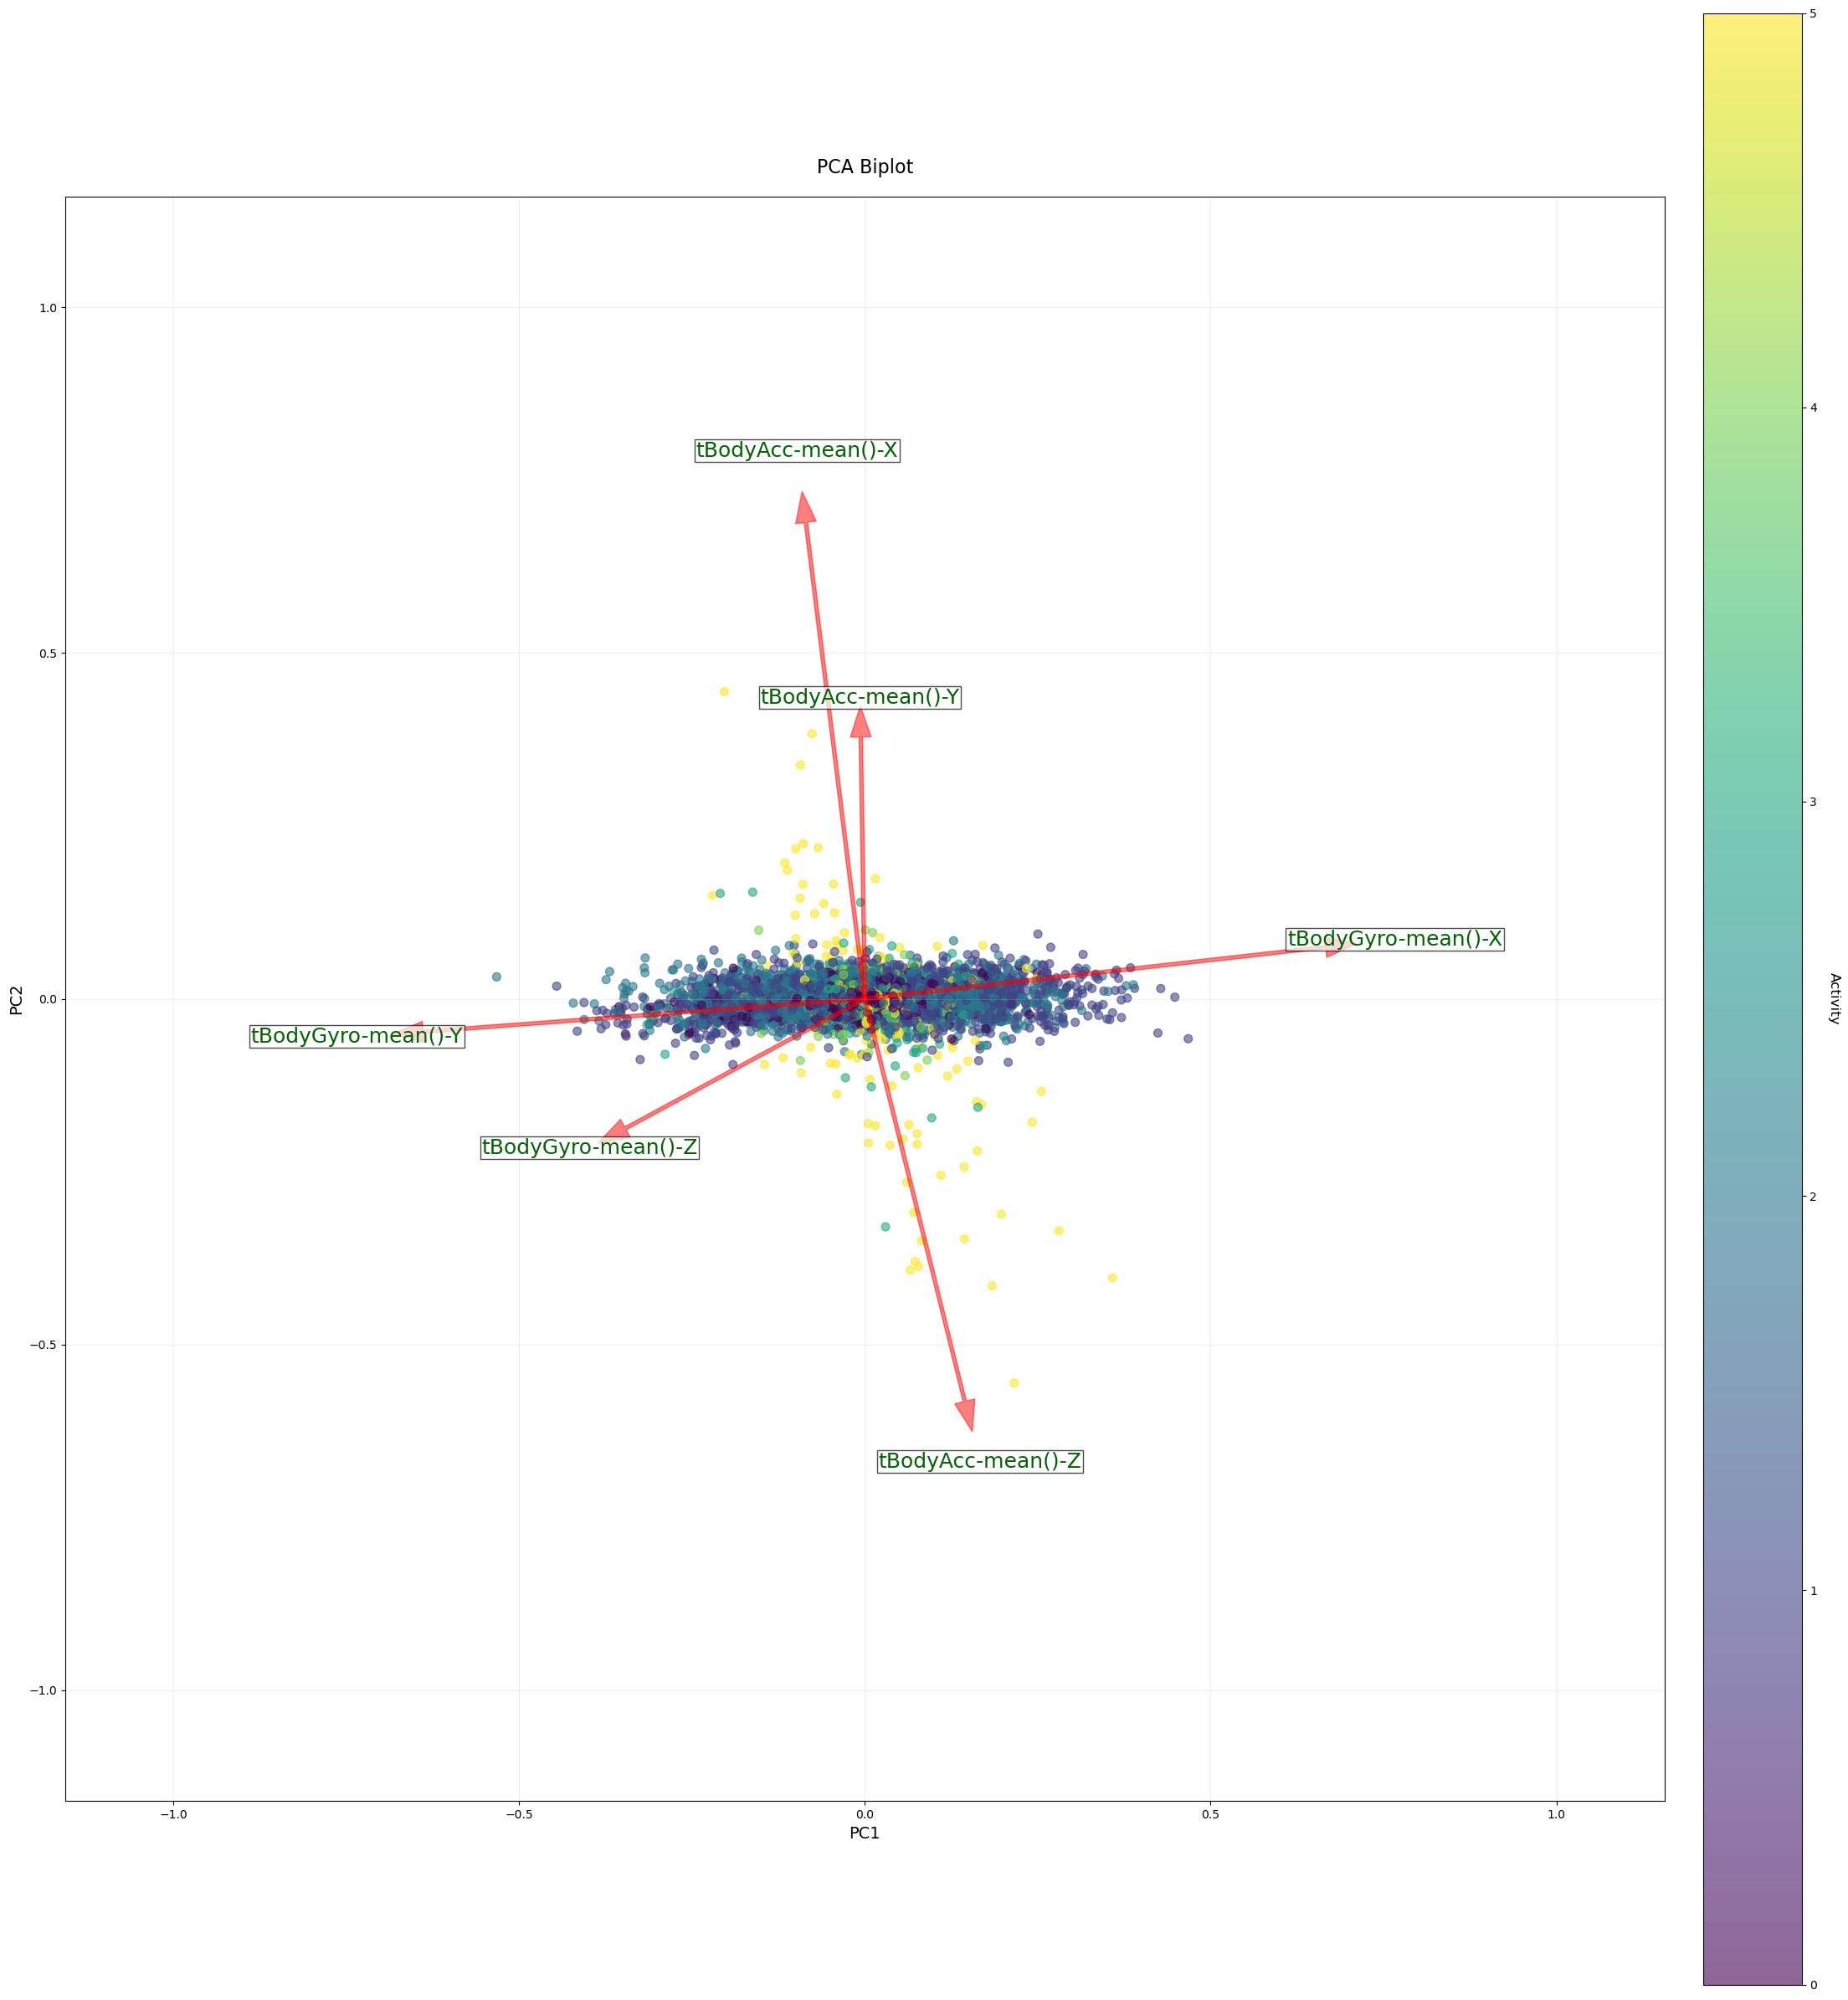

In [140]:
def biplot(score, coeff, labels=None, figsize=(20, 20), fontsize=10, dpi=100):
    plt.figure(figsize=figsize, dpi=dpi)
    xs = score[:, 0]
    ys = score[:, 1]
    n = coeff.shape[0]
    
    # Scale the scores to match coefficient scale
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    xs_scaled = xs * scalex
    ys_scaled = ys * scaley
    
    # Plot scores with better visibility
    scatter = plt.scatter(xs_scaled, ys_scaled, 
                         c=full_df['Activity'].astype('category').cat.codes,
                         cmap='viridis', alpha=0.6, s=50)
    
    # Plot arrows and labels
    arrow_length_multiplier = 1.5  # Increased from 1.15 for better spacing
    # Adjust these parameters for fewer columns
    base_distance = 1.15  # Reduced from 1.25
    min_spacing = 0.1     # Reduced from 0.15

    # Plot arrows and labels
    for i in range(n):
        # Draw an arrow
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], 
                 color='r', alpha=0.5, width=0.005, head_width=0.03)
        
        # Calculate initial text position (closer than before)
        text_x = coeff[i,0] * base_distance
        text_y = coeff[i,1] * base_distance
        
        # Add the text label
        if labels is None:
            plt.text(text_x, text_y, f"Var{i+1}", 
                    color='darkgreen', ha='center', va='center',
                    fontsize=fontsize, 
                    bbox=dict(facecolor='white', alpha=0.7, pad=1))
        else:
            plt.text(text_x, text_y, labels[i], 
                    color='darkgreen', ha='center', va='center',
                    fontsize=fontsize, 
                    bbox=dict(facecolor='white', alpha=0.7, pad=1))
    
    # # First pass: plot all arrows
    # for i in range(n):
    #     plt.arrow(0, 0, coeff[i,0], coeff[i,1], 
    #              color='r', alpha=0.5, width=0.005, 
    #              head_width=0.03, length_includes_head=True)
    
    # # Second pass: plot labels with intelligent placement
    # label_positions = []
    # for i in range(n):
    #     # Calculate direction vector
    #     dx, dy = coeff[i,0], coeff[i,1]
    #     angle = np.arctan2(dy, dx)
        
    #     # Initial label position
    #     label_distance = arrow_length_multiplier
    #     x_text = dx * label_distance
    #     y_text = dy * label_distance
        
    #     # Adjust position if overlapping with existing labels
    #     adjustment_step = 0.05
    #     while any(np.sqrt((x_text - pos[0])**2 + (y_text - pos[1])**2) < 0.2 
    #             for pos in label_positions):
    #         label_distance += adjustment_step
    #         x_text = dx * label_distance
    #         y_text = dy * label_distance
        
    #     label_positions.append((x_text, y_text))
        
    #     # Add the text label
    #     text_content = f"Var{i+1}" if labels is None else labels[i]
    #     plt.text(x_text, y_text, text_content, 
    #             color='darkgreen', ha='center', va='center',
    #             fontsize=fontsize, 
    #             bbox=dict(facecolor='white', alpha=0.8, pad=2, edgecolor='none'))
    
    # Axis labels and title
    plt.xlabel("PC1", fontsize=14)
    plt.ylabel("PC2", fontsize=14)
    plt.grid(alpha=0.2)
    plt.title('PCA Biplot', fontsize=16, pad=20)
    
    # Colorbar for activities
    cbar = plt.colorbar(scatter, pad=0.02)
    cbar.set_label('Activity', rotation=270, labelpad=20, fontsize=12)
    
    # Set equal aspect ratio and adjust limits
    plt.gca().set_aspect('equal', adjustable='box')
    x_margin = 0.2 * (np.max(np.abs(plt.xlim())))
    y_margin = 0.2 * (np.max(np.abs(plt.ylim())))
    plt.xlim(-1 - x_margin, 1 + x_margin)
    plt.ylim(-1 - y_margin, 1 + y_margin)
    
    plt.tight_layout()

# Select top features for biplot
# top_features = min(20, len(df_numeric.columns))  # Ensure we don't exceed available features
limited_df = df_numeric[[
    'tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
    'tBodyGyro-mean()-X', 'tBodyGyro-mean()-Y', 'tBodyGyro-mean()-Z',
]].copy()
top_features = min(20, len(limited_df.columns))  # Ensure we don't exceed available features
feature_names = limited_df.columns

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(limited_df)

pca = PCA(n_components=2)
pca.fit(X_scaled)

# Get the coefficients for the top features
coeff = np.transpose(pca.components_[:2, :])
most_important = [np.abs(coeff[:,i]).argsort()[::-1][:top_features] for i in range(2)]
most_important = np.unique(np.concatenate(most_important))

# Generate the biplot
biplot(pca.transform(X_scaled)[:, :2], 
       coeff[most_important, :2], 
       labels=feature_names[most_important],
       figsize=(24, 24),  # Very large figure size
       fontsize=18)       # Larger font size

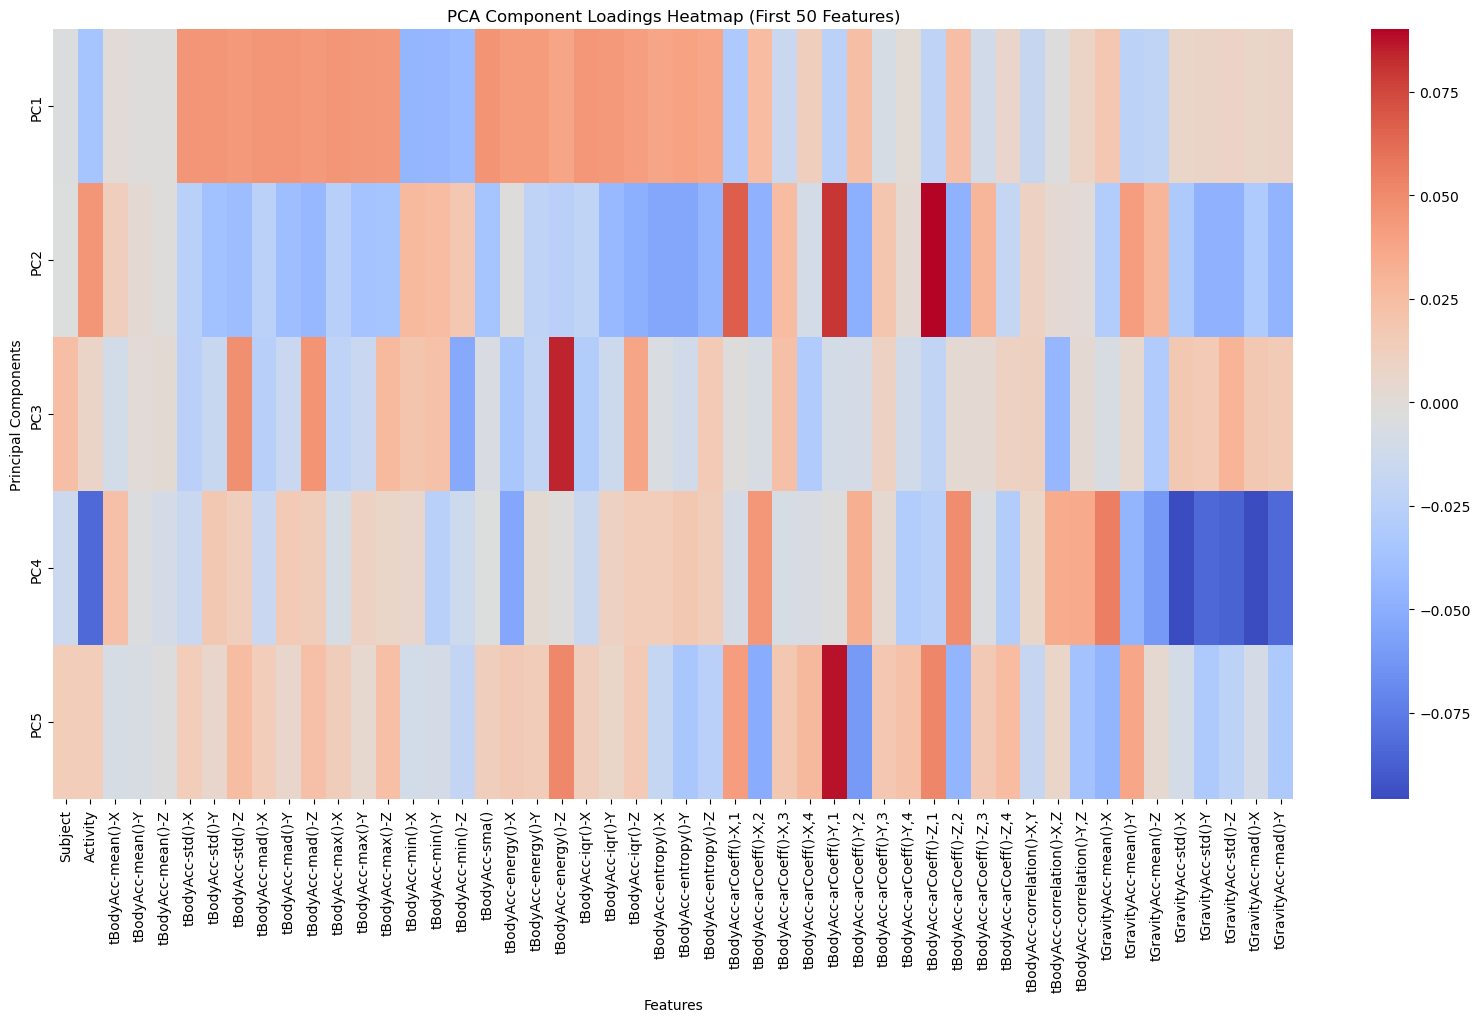

In [46]:
# Get first 5 principal components
pca = PCA(n_components=5)
pca.fit(X_scaled)

# Create heatmap of component loadings
plt.figure(figsize=(20, 10))
sns.heatmap(pca.components_[:, :50],  # Show first 50 features for clarity
            cmap='coolwarm',
            yticklabels=[f'PC{i+1}' for i in range(5)],
            xticklabels=feature_names[:50])
plt.title('PCA Component Loadings Heatmap (First 50 Features)')
plt.xlabel('Features')
plt.ylabel('Principal Components')
plt.show()

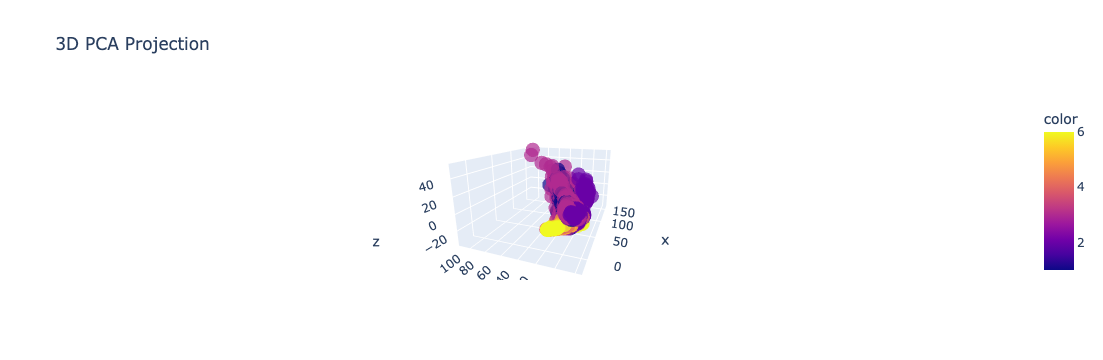

In [52]:
import plotly.express as px

pca = PCA(n_components=3)
pca_result = pca.fit_transform(X_scaled)

fig = px.scatter_3d(
    x=pca_result[:, 0], y=pca_result[:, 1], z=pca_result[:, 2],
    color=full_df['Activity'],
    title='3D PCA Projection',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'},
    opacity=0.7
)
fig.show()

# Sample Feature Exploration (Participant details)

This is a brief overview of the data collected when participants were completing directed behaviors. This helps understand what information might be useful to do comparative visualizations with.

# Count Plots
---

## Activities Count
---

This visualization shows the distribution of activities by the Activity Name. This gives us a better sense of how equal the distribution of tests was between the 30 participants.

# Regression Plot

This will show the regression analysis between all the activities

# Box Plots

The dataset gauges the density of Anxiety levels (GAD), Social Phobia levels (SPIN),
and Life Satisfaction levels (SWL). This helps to show the distribution of participants
among the three factors.

## Distribution of Body Acceleration (Mean)
---

This visualization shows the distribution of each axis from the data collected (x-axis, y-axis, and z-axis).

## Distribution of Body Acceleration (Standard Deviation)
---

This visualization shows the distribution of each axis from the data collected (x-axis, y-axis, and z-axis).

# Principal Component Analysis (PCA)
---

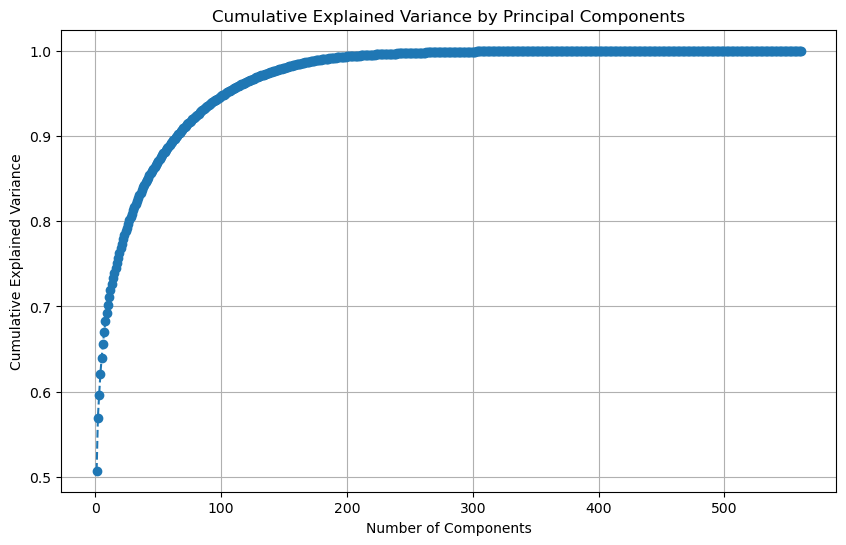

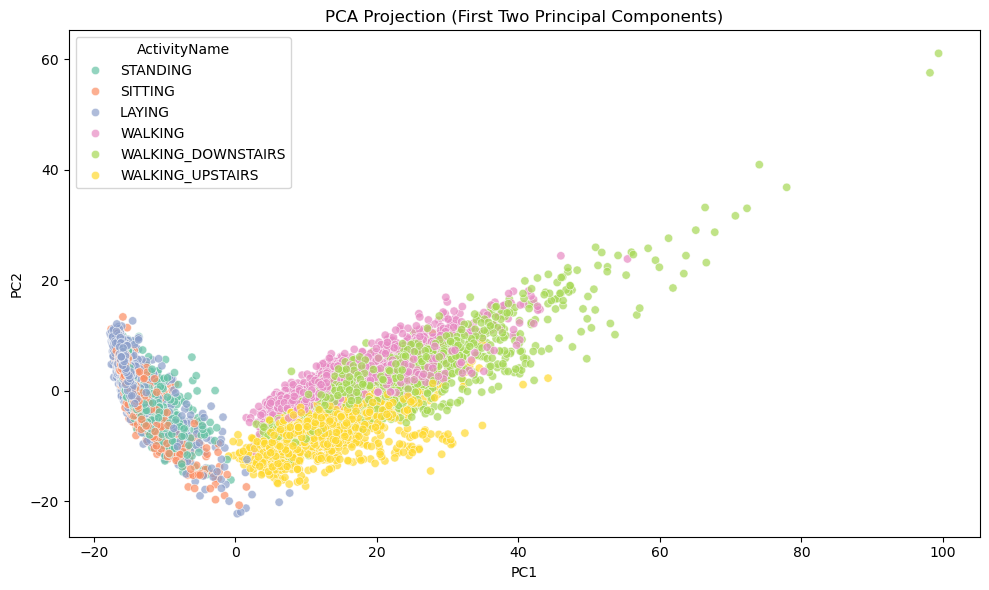

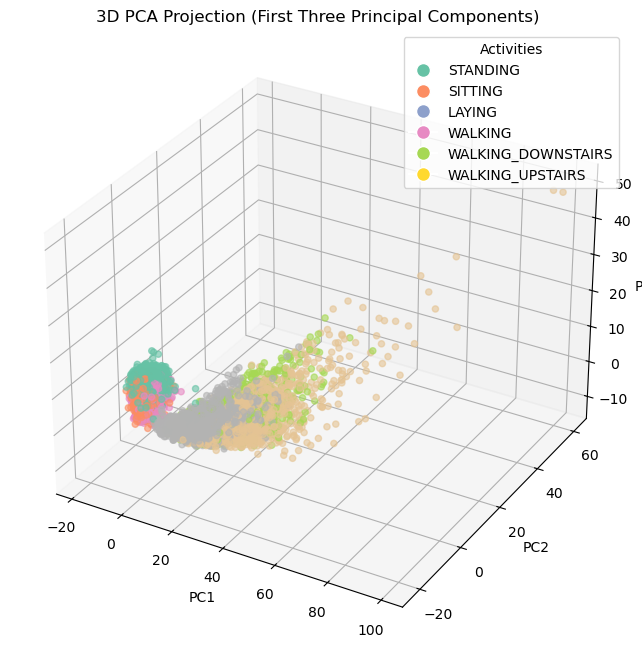


Explained variance ratio (first 10 components):
[0.50738221 0.06239186 0.02692564 0.02452871 0.01888936 0.01631395
 0.01414533 0.01216211 0.00985248 0.00949228]

Total variance explained by first two components: 56.98%


In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Drop non-numeric columns
X = full_df.drop(columns=['Subject', 'Activity', 'ActivityName'])

# Drop duplicate ActivityName columns generated by Seaborn (if they exist)
if 'ActivityName_x' in X.columns or 'ActivityName_y' in X.columns:
    X = X.drop(columns=['ActivityName_x', 'ActivityName_y'])

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA - keeping all components initially
pca = PCA()  # No n_components specified gets all components
pca_result = pca.fit_transform(X_scaled)

# Create DataFrame with all PCA results
pca_columns = [f'PC{i+1}' for i in range(pca_result.shape[1])]
pca_df = pd.DataFrame(pca_result, columns=pca_columns)
pca_df['ActivityName'] = full_df['ActivityName']  # Add activity label back for plotting

# 1. Scree Plot (Variance Explained)
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), 
         pca.explained_variance_ratio_.cumsum(), 
         marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by Principal Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.savefig('pca-scree-plot.png', dpi=300, bbox_inches='tight')
plt.show()

# 2. 2D Projection (PC1 vs PC2)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='ActivityName', 
                alpha=0.7, palette='Set2')
plt.title('PCA Projection (First Two Principal Components)')
plt.savefig('pca-activities-scatterplot.png', dpi=300, transparent=False, bbox_inches='tight')
plt.tight_layout()
plt.show()

# 3. Optional: 3D Projection (PC1, PC2, PC3)
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'], 
                    c=pca_df['ActivityName'].astype('category').cat.codes,
                    cmap='Set2', alpha=0.6)

# Create legend
legend_labels = pca_df['ActivityName'].unique()
handles = [plt.Line2D([0], [0], marker='o', color='w', 
                     markerfacecolor=plt.cm.Set2(i), markersize=10)
          for i in range(len(legend_labels))]
ax.legend(handles, legend_labels, title='Activities')

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.title('3D PCA Projection (First Three Principal Components)')
plt.savefig('pca-3d-projection.png', dpi=300, bbox_inches='tight')
plt.show()

# Print component information
print("\nExplained variance ratio (first 10 components):")
print(pca.explained_variance_ratio_[:10])

print("\nTotal variance explained by first two components: {:.2f}%".format(
    sum(pca.explained_variance_ratio_[:2]) * 100))

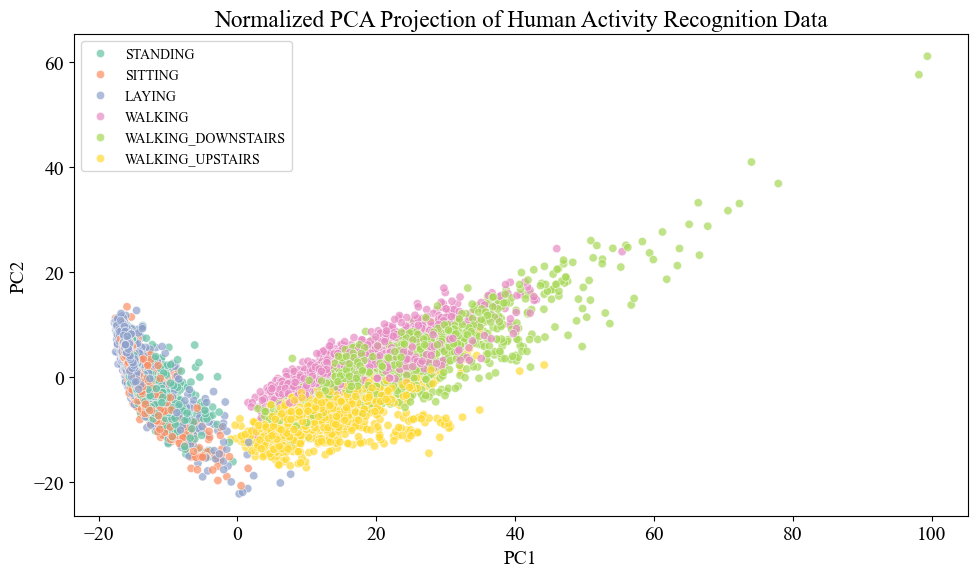

In [200]:
# Drop non-numeric columns
X = full_df.drop(columns=['Subject', 'Activity', 'ActivityName'])

# Drop duplicate ActivityName columns generated by Seaborn (if they exist)
if 'ActivityName_x' in X.columns or 'ActivityName_y' in X.columns:
    X = X.drop(columns=['ActivityName_x', 'ActivityName_y'])

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

# Create DataFrame with PCA result
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])
pca_df['ActivityName'] = full_df['ActivityName']  # Add activity label back for plotting

# Graph the reduced DataFrame
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='ActivityName', alpha=0.7, palette='Set2')
plt.title('Normalized PCA Projection of Human Activity Recognition Data')

# Save the graph as a PNG
plt.savefig(
    'pca-activities-scattplot.png',
    dpi=300,               # High resolution
    transparent=False,     # Transparent background
    bbox_inches='tight'   # Remove extra whitespace
)
plt.legend(prop={'family': 'Times New Roman', 'size': 10})
# Adjust layout to prevent label cutoff
plt.tight_layout()
plt.show()

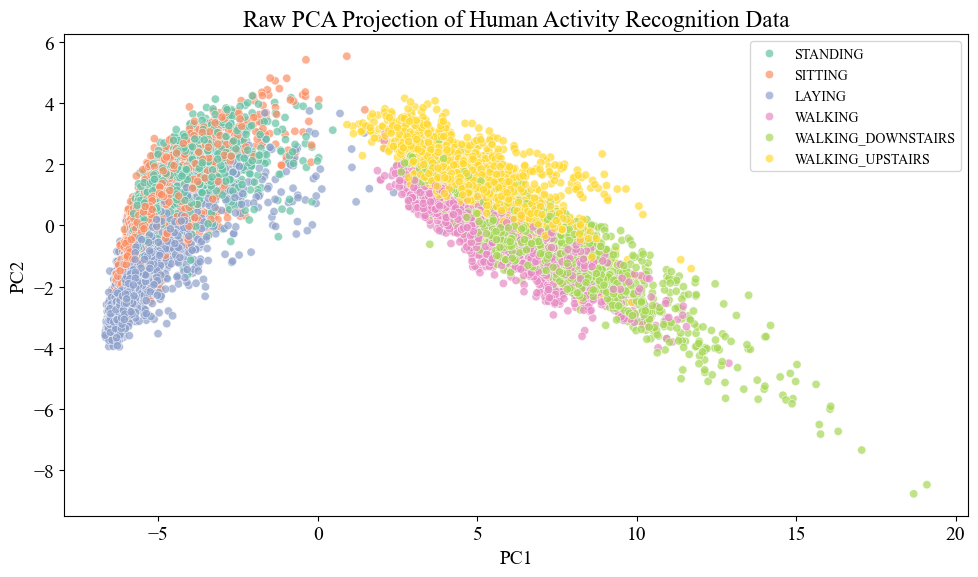

In [202]:
# Drop non-numeric columns
X = full_df.drop(columns=['Subject', 'Activity', 'ActivityName'])

# Drop duplicate ActivityName columns generated by Seaborn (if they exist)
if 'ActivityName_x' in X.columns or 'ActivityName_y' in X.columns:
    X = X.drop(columns=['ActivityName_x', 'ActivityName_y'])

# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)

# Create DataFrame with PCA result
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])
pca_df['ActivityName'] = full_df['ActivityName']  # Add activity label back for plotting

# Graph the reduced DataFrame
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='ActivityName', alpha=0.7, palette='Set2')
plt.title('Raw PCA Projection of Human Activity Recognition Data')

plt.legend(prop={'family': 'Times New Roman', 'size': 10})

# Save the graph as a PNG
plt.savefig(
    'pca-activities-scattplot.png',
    dpi=300,               # High resolution
    transparent=False,     # Transparent background
    bbox_inches='tight'   # Remove extra whitespace
)
# Adjust layout to prevent label cutoff
plt.tight_layout()
plt.show()

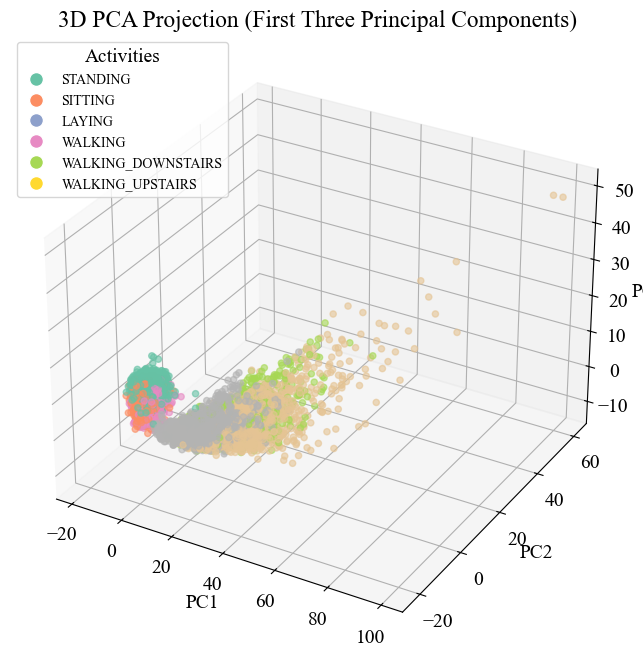


Explained variance ratio (first 10 components):
[0.50738221 0.06239186 0.02692564 0.02452871 0.01888936 0.01631395
 0.01414533 0.01216211 0.00985248 0.00949228]

Total variance explained by first two components: 56.98%


In [212]:
# 3. Optional: 3D Projection (PC1, PC2, PC3)
from mpl_toolkits.mplot3d import Axes3D

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
pca_result = pca.fit_transform(X_scaled)

# Create DataFrame with all PCA results
pca_columns = [f'PC{i+1}' for i in range(pca_result.shape[1])]
pca_df = pd.DataFrame(pca_result, columns=pca_columns)
pca_df['ActivityName'] = full_df['ActivityName']  # Add activity label back for plotting

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'], 
                    c=pca_df['ActivityName'].astype('category').cat.codes,
                    cmap='Set2', alpha=0.6)

# Create legend
legend_labels = pca_df['ActivityName'].unique()
handles = [plt.Line2D([0], [0], marker='o', color='w', 
                     markerfacecolor=plt.cm.Set2(i), markersize=10)
          for i in range(len(legend_labels))]
ax.legend(handles, legend_labels, title='Activities', prop={'family': 'Times New Roman', 'size': 10})

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.title('3D PCA Projection (First Three Principal Components)')
plt.savefig('pca-3d-projection.png', dpi=300, bbox_inches='tight')
plt.show()

# Print component information
print("\nExplained variance ratio (first 10 components):")
print(pca.explained_variance_ratio_[:10])

print("\nTotal variance explained by first two components: {:.2f}%".format(
    sum(pca.explained_variance_ratio_[:2]) * 100))

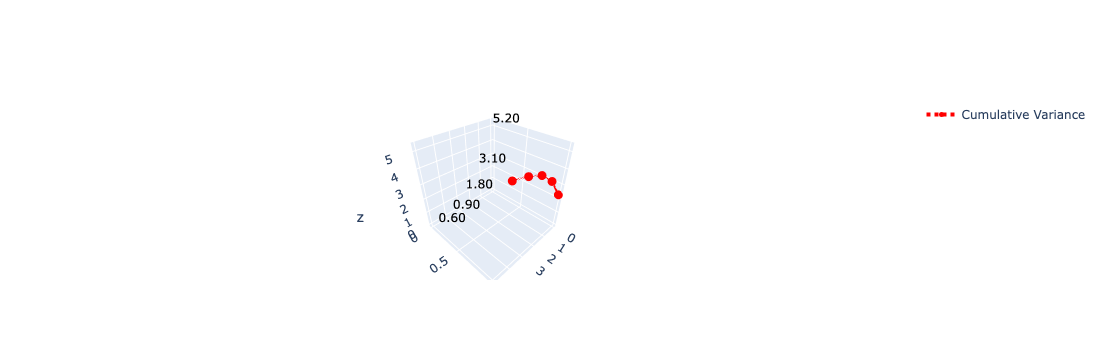

In [259]:
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Sample data
eigenvalues = np.array([5.2, 3.1, 1.8, 0.9, 0.6])
explained_variance = eigenvalues / np.sum(eigenvalues)
cumulative_variance = np.cumsum(explained_variance)

# Create 3D visualization
fig = make_subplots(rows=1, cols=1, specs=[[{'type': 'scatter3d'}]])

# # Add 3D bars for eigenvalues
# fig.add_trace(
#     go.Bar3D(
#         x=np.arange(len(eigenvalues)),  # PC numbers
#         y=np.zeros(len(eigenvalues)),  # Y position
#         z=np.zeros(len(eigenvalues)),  # Base at z=0
#         dx=0.8*np.ones(len(eigenvalues)),  # Bar width
#         dy=0.8*np.ones(len(eigenvalues)),  # Bar depth
#         dz=eigenvalues,                  # Bar height
#         name='Eigenvalues',
#         marker=dict(color='#1f77b4'),
#         hovertemplate='<b>PC %{x}</b><br>Eigenvalue: %{z:.2f}<extra></extra>'
#     ),
#     row=1, col=1
# )

# Simulate 3D bars using rectangular markers
for i, val in enumerate(eigenvalues):

    # For one bar (repeat for each eigenvalue)
    fig.add_trace(
        go.Mesh3d(
            x=[i, i+0.8, i+0.8, i, i, i+0.8, i+0.8, i],
            y=[0, 0, 0, 0, 0, 0, 0, 0],
            z=[0, 0, val, val, 0, 0, val, val],
            # color='black'
        )
    )
    
    # fig.add_trace(
    #     go.Scatter3d(
    #         x=[i+1, i+1, i+1, i+1, i+1],  # X positions for rectangle corners
    #         y=[0, 0.8, 0.8, 0, 0],        # Y dimensions (width)
    #         z=[0, 0, val, val, 0],        # Z dimensions (height)
    #         mode='lines',
    #         line=dict(color='#1f77b4', width=2),
    #         name=f'PC {i+1}',
    #         showlegend=False,
    #         surfaceaxis=1  # Helps with 3D rendering
    #     )
    # )
    
    # Add eigenvalue text
    fig.add_trace(
        go.Scatter3d(
            x=[i+1],
            y=[0.4],
            z=[val + 0.1],
            mode='text',
            text=[f'{val:.2f}'],
            textfont=dict(size=12, color='black'),
            showlegend=False
        )
    )

# Add a cumulative variance line
fig.add_trace(
    go.Scatter3d(
        x=np.arange(len(eigenvalues)),
        y=np.ones(len(eigenvalues)),
        z=cumulative_variance*max(eigenvalues),
        mode='lines+markers',
        name='Cumulative Variance',
        line=dict(color='red', width=4, dash='dot'),
        marker=dict(size=5, color='red'),
        hovertemplate='<b>PC %{x}</b><br>Cumulative: %{z:.1%}<extra></extra>'
    ),
    row=1, col=1
)

# # Add explained variance as text labels
# for i, (ev, cv) in enumerate(zip(explained_variance, cumulative_variance)):
#     fig.add_trace(
#         go.Scatter3d(
#             x=[i],
#             y=[0.5],
#             z=[eigenvalues[i] + 0.2],
#             mode='text',
#             text=[f"{ev:.1%}"],
#             textfont=dict(size=14, color='black'),
#             showlegend=False,
#             hoverinfo='skip'
#         )
#     )
    
#     fig.add_trace(
#         go.Scatter3d(
#             x=[i],
#             y=[1.5],
#             z=[cv*max(eigenvalues) + 0.2],
#             mode='text',
#             text=[f"{cv:.1%}"],
#             textfont=dict(size=14, color='red'),
#             showlegend=False,
#             hoverinfo='skip'
#         )
#     )

# # Update layout with Times New Roman font
# fig.update_layout(
#     title=dict(
#         text='3D Interactive Scree Plot',
#         font=dict(family='Times New Roman', size=24),
#         x=0.5
#     ),
#     scene=dict(
#         xaxis=dict(title='Principal Component', titlefont=dict(size=18)),
#         yaxis=dict(title='', showticklabels=False),
#         zaxis=dict(title='Value', titlefont=dict(size=18)),
#         camera=dict(eye=dict(x=1.5, y=1.5, z=0.8))
#     ),
#     font=dict(family='Times New Roman', size=14),
#     legend=dict(
#         font=dict(size=16),
#         x=0.8,
#         y=0.9
#     ),
#     hoverlabel=dict(
#         font=dict(family='Times New Roman', size=14)
#     ),
#     height=800,
#     margin=dict(l=0, r=0, b=0, t=80)
# )

# # Add dropdown menu
# fig.update_layout(
#     updatemenus=[
#         dict(
#             type='buttons',
#             direction='right',
#             x=0.1,
#             y=1.15,
#             buttons=list([
#                 dict(
#                     label='Reset View',
#                     method='relayout',
#                     args=['scene.camera', dict(eye=dict(x=1.5, y=1.5, z=0.8))]
#                 ),
#                 dict(
#                     label='Top View',
#                     method='relayout',
#                     args=['scene.camera', dict(eye=dict(x=0, y=0, z=2.5))]
#                 ),
#                 dict(
#                     label='Side View',
#                     method='relayout',
#                     args=['scene.camera', dict(eye=dict(x=2.5, y=0, z=0))]
#                 )
#             ])
#         )
#     ]
# )

fig.show()

In [251]:
import plotly
print(plotly.__version__)  # Should be ≥ 4.0

5.24.1


# Heatmaps
---

These heatmaps show the correlation between the mean and standard deviation of the data collected

## Body Acceleration Heatmap (Mean and Standard Deviation)

This visualization shows the mean and standard deviation of body acceleration as a heatmap.

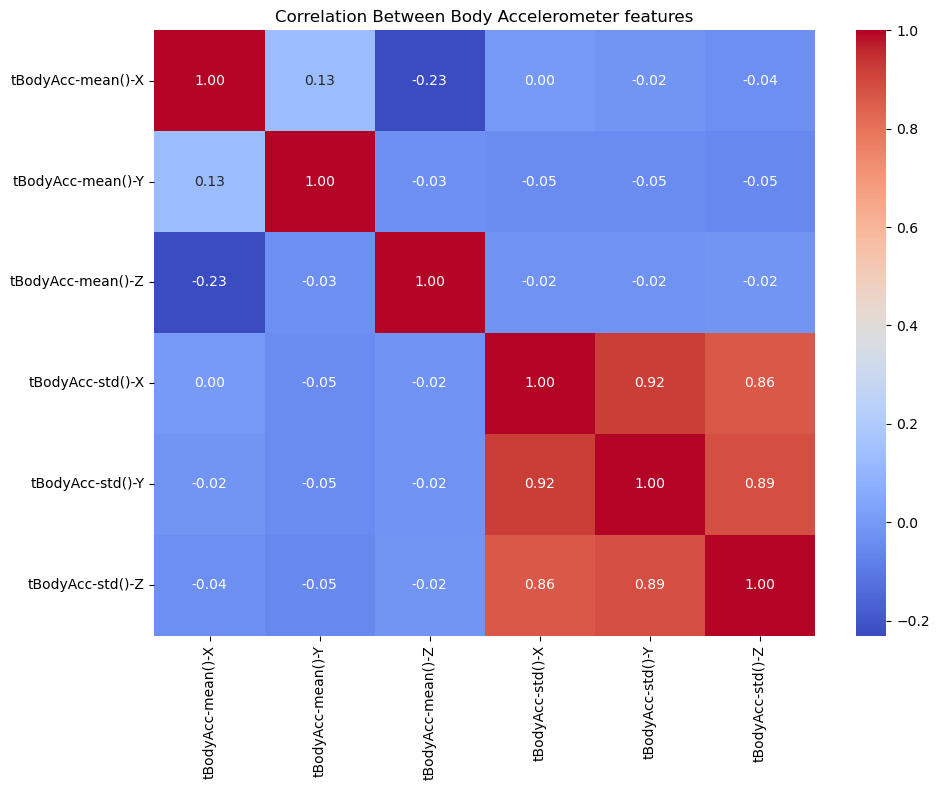

In [12]:
# The data subset for this heatmap
subset = full_df[['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
                  'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z']]
# Setup the visualization
plt.figure(figsize=(10, 8))
sns.heatmap(subset.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between Body Accelerometer features')

# Save the graph as a PNG
plt.savefig(
    'body-acceleration-heatmap.png',
    dpi=300,               # High resolution
    transparent=False,     # Transparent background
    bbox_inches='tight'   # Remove extra whitespace
)
# Adjust layout to prevent label cutoff
plt.tight_layout()
plt.show()

## Body Gyroscope Heatmap (Mean and Standard Deviation)

This visualization shows the mean and standard deviation of body rotation as a heat map.

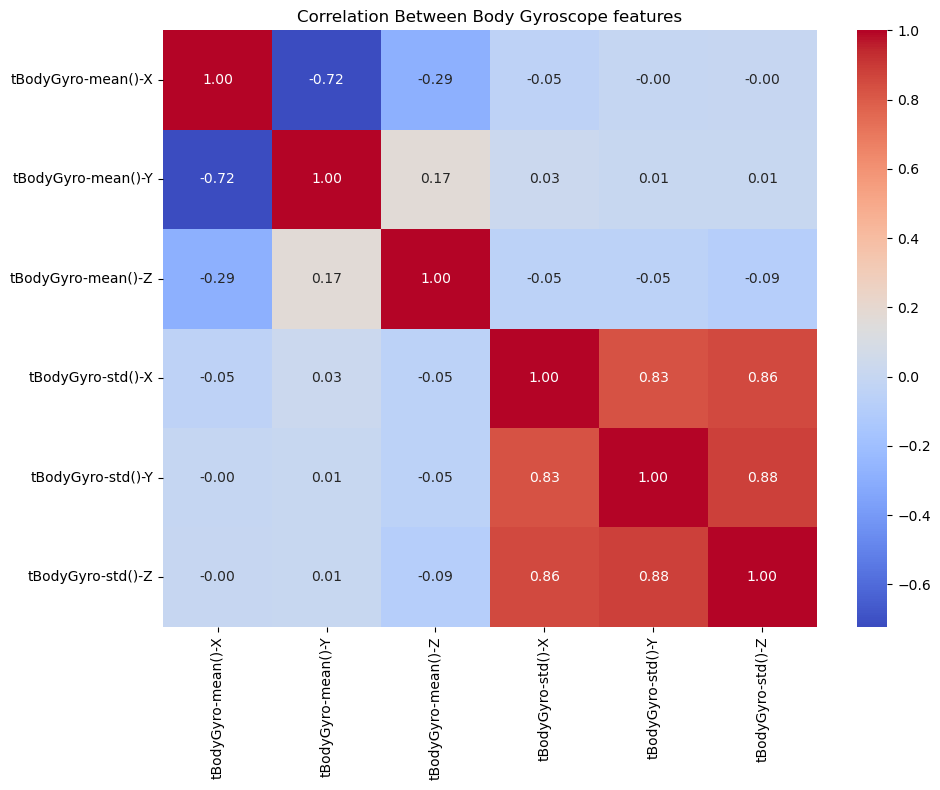

In [13]:
# The data subset for this heatmap
subset = full_df[['tBodyGyro-mean()-X', 'tBodyGyro-mean()-Y', 'tBodyGyro-mean()-Z',
                  'tBodyGyro-std()-X', 'tBodyGyro-std()-Y', 'tBodyGyro-std()-Z']]
# Setup the visualization
plt.figure(figsize=(10, 8))
sns.heatmap(subset.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between Body Gyroscope features')

# Save the graph as a PNG
plt.savefig(
    'body-gyroscope-heatmap.png',
    dpi=300,               # High resolution
    transparent=False,     # Transparent background
    bbox_inches='tight'   # Remove extra whitespace
)
# Adjust layout to prevent label cutoff
plt.tight_layout()
plt.show()

# Pair Plots
---

These pair plots show the clustering and spatial relationships between the various activities and measurements

## Body Acceleration Pair Plot
---

This visualization shows the body acceleration metrics for each activity and reflects how they cluster

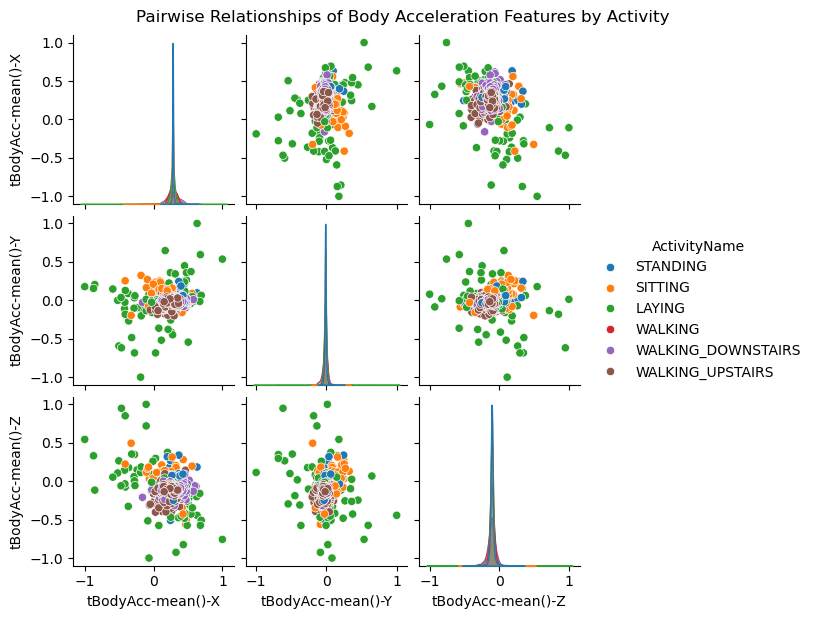

In [14]:
# Extract the body acceleration features
selected_features = ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z']
# Generate Pair plot
sns.pairplot(full_df[selected_features + ['ActivityName']], hue='ActivityName', height=2)
plt.suptitle('Pairwise Relationships of Body Acceleration Features by Activity', y=1.02)

# Save the graph as a PNG
plt.savefig(
    'body-acceleration-pairplot.png',
    dpi=300,               # High resolution
    transparent=False,     # Transparent background
    bbox_inches='tight'   # Remove extra whitespace
)
# Show the visualization
plt.show()

## Body Rotation Pair Plot
---

This visualization shows the body rotation metrics for each activity and reflects how they cluster

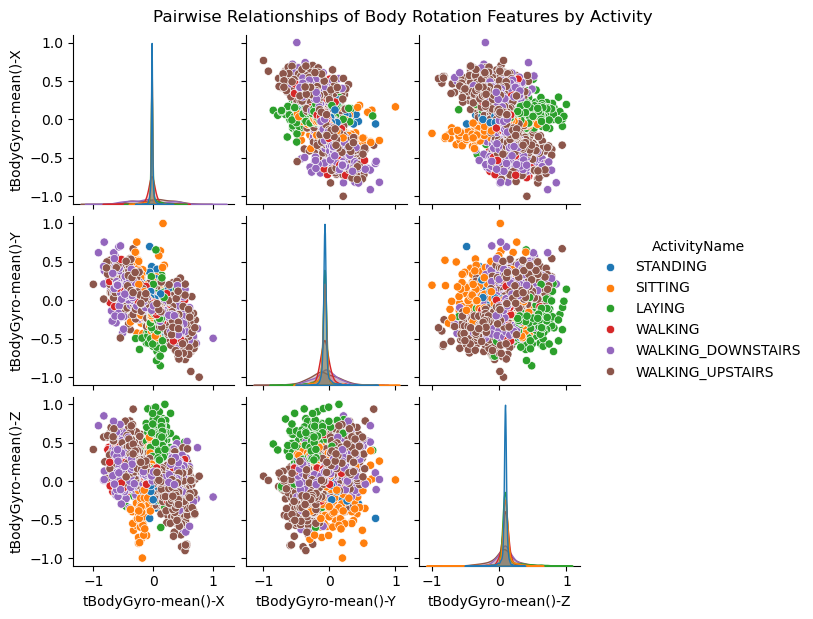

In [15]:
# Extract the body rotation features
selected_features = ['tBodyGyro-mean()-X', 'tBodyGyro-mean()-Y', 'tBodyGyro-mean()-Z']
# Generate Pair plot
sns.pairplot(full_df[selected_features + ['ActivityName']], hue='ActivityName', height=2)
plt.suptitle('Pairwise Relationships of Body Rotation Features by Activity', y=1.02)

# Save the graph as a PNG
plt.savefig(
    'body-gyro-pairplot.png',
    dpi=300,               # High resolution
    transparent=False,     # Transparent background
    bbox_inches='tight'   # Remove extra whitespace
)
# Show the visualization
plt.show()

## Body Acceleration and Rotation (Combined) Pair Plot
---

This visualization shows the body acceleration and rotation metrics for each activity and reflects how they cluster

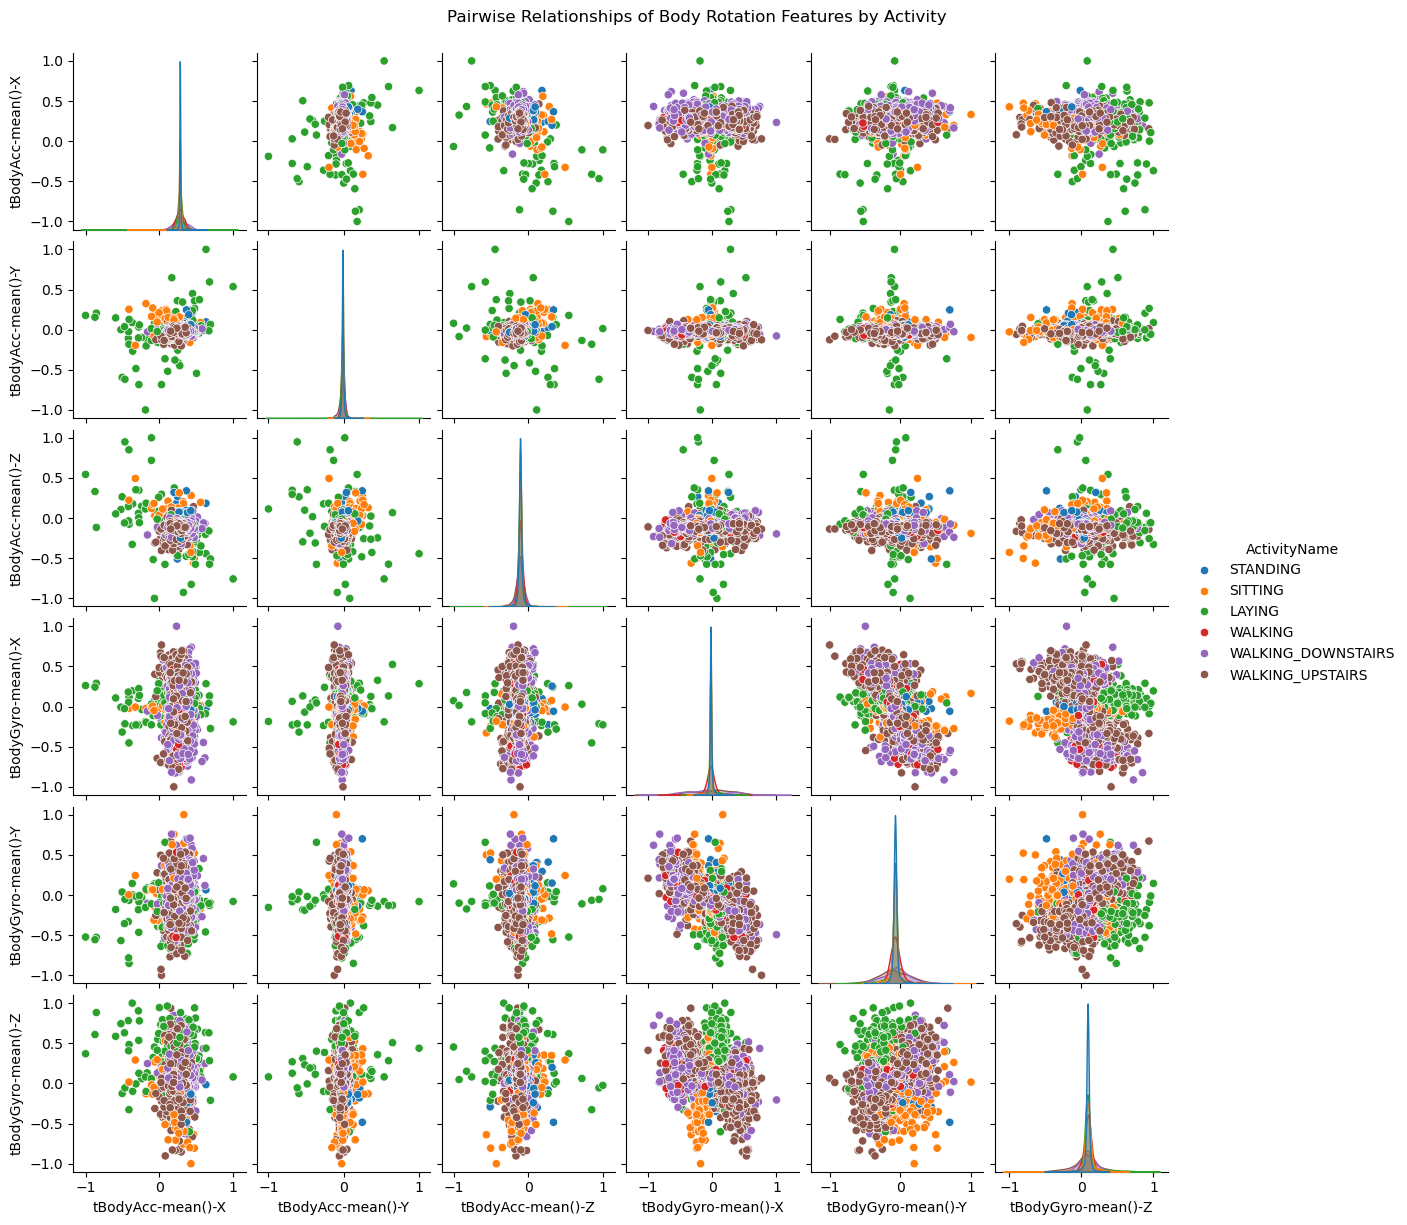

In [16]:
# Extract the body rotation features
selected_features = ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
                     'tBodyGyro-mean()-X', 'tBodyGyro-mean()-Y', 'tBodyGyro-mean()-Z']
# Generate Pair plot
sns.pairplot(full_df[selected_features + ['ActivityName']], hue='ActivityName', height=2)
plt.suptitle('Pairwise Relationships of Body Rotation Features by Activity', y=1.02)

# Save the graph as a PNG
plt.savefig(
    'body-gyroandacceleration-pairplot.png',
    dpi=300,               # High resolution
    transparent=False,     # Transparent background
    bbox_inches='tight'   # Remove extra whitespace
)
# Show the visualization
plt.show()

# Histogram Plots
---

These histograms show the frequency distributions per activity

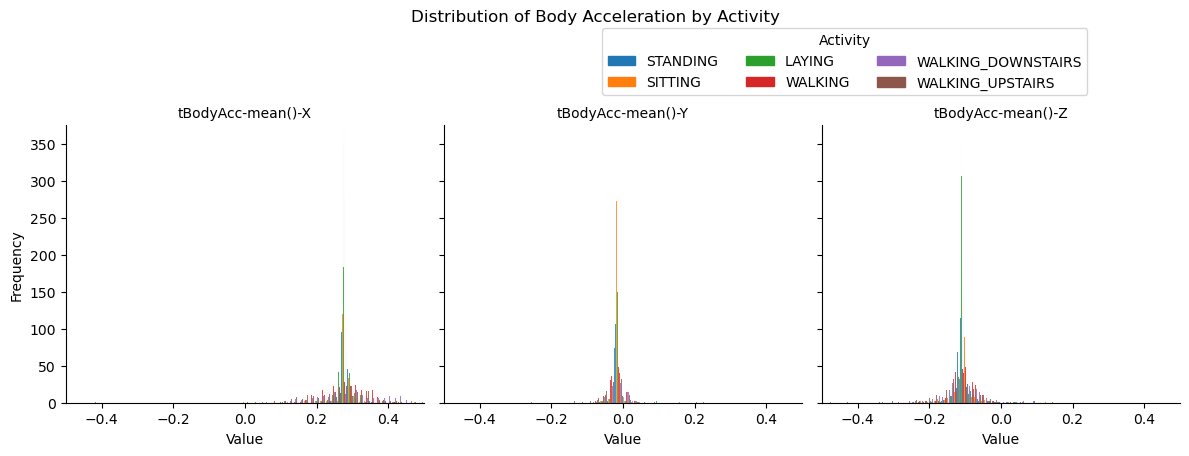

In [17]:
# Select features
selected_features = ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z']

# Define a consistent palette
palette = sns.color_palette("tab10", n_colors=full_df['ActivityName'].nunique())
activity_order = full_df['ActivityName'].unique()
color_map = dict(zip(activity_order, palette))

# Melt the DataFrame
melted_df = full_df.melt(
    id_vars='ActivityName',
    value_vars=selected_features,
    var_name='Feature',
    value_name='Value'
)

# Create FacetGrid
g = sns.FacetGrid(
    melted_df,
    col='Feature',
    col_wrap=3,
    height=4,
    sharex=True,
    sharey=True
)

# Plot using map_dataframe to allow hue and palette
g.map_dataframe(
    sns.histplot,
    x='Value',
    hue='ActivityName',
    multiple='dodge',
    element='bars',
    palette=color_map,
    alpha=0.8,
    legend=False  # Disable auto legend
)

# Manually create legend handles with correct colors
handles = [mpatches.Patch(color=color_map[activity], label=activity) for activity in activity_order]

# Add a custom legend to the figure
g.fig.legend(
    handles=handles,
    title='Activity',
    loc='upper left',
    bbox_to_anchor=(0.5, 1.10),
    ncol=3,
    frameon=True
)

# Final visualization settings
g.set_axis_labels('Value', 'Frequency')
g.set_titles('{col_name}')
g.set(xlim=(-0.5, 0.5), ylim=(0, 375))  # Customize based on data ranges
g.fig.suptitle('Distribution of Body Acceleration by Activity', y=1.13)

# Save the graph as a PNG
plt.savefig(
    'body-acceleration-facetgrid.png',
    dpi=300,               # High resolution
    transparent=False,     # Transparent background
    bbox_inches='tight'   # Remove extra whitespace
)
# Adjust layout to prevent label cutoff
plt.tight_layout()
plt.show()

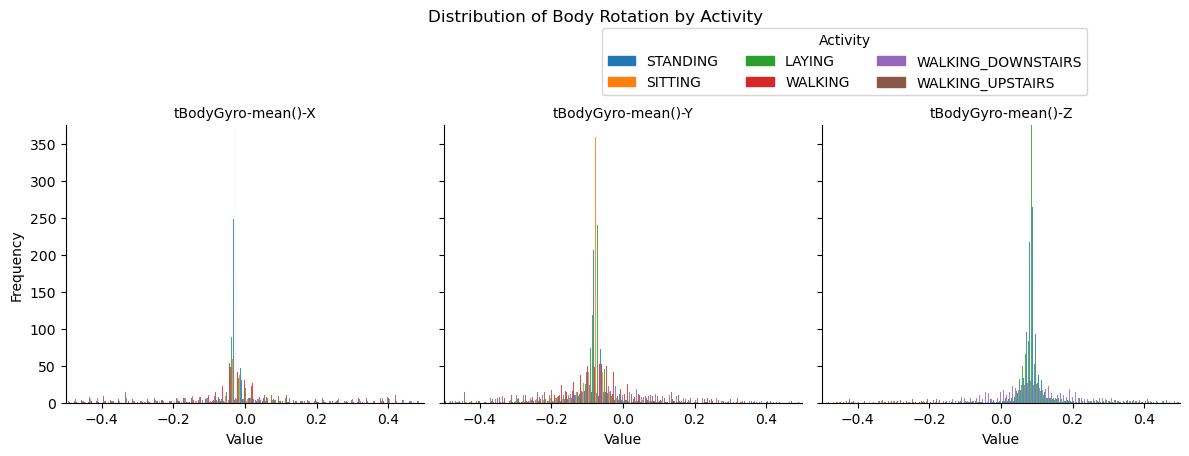

In [18]:
# Select features
selected_features = ['tBodyGyro-mean()-X', 'tBodyGyro-mean()-Y', 'tBodyGyro-mean()-Z']

# Define a consistent palette
palette = sns.color_palette("tab10", n_colors=full_df['ActivityName'].nunique())
activity_order = full_df['ActivityName'].unique()
color_map = dict(zip(activity_order, palette))

# Melt the DataFrame
melted_df = full_df.melt(
    id_vars='ActivityName',
    value_vars=selected_features,
    var_name='Feature',
    value_name='Value'
)

# Create FacetGrid
g = sns.FacetGrid(
    melted_df,
    col='Feature',
    col_wrap=3,
    height=4,
    sharex=True,
    sharey=True
)

# Plot using map_dataframe to allow hue and palette
g.map_dataframe(
    sns.histplot,
    x='Value',
    hue='ActivityName',
    multiple='dodge',
    element='bars',
    palette=color_map,
    alpha=0.8,
    legend=False  # Disable auto legend
)

# Manually create legend handles with correct colors
handles = [mpatches.Patch(color=color_map[activity], label=activity) for activity in activity_order]

# Add a custom legend to the figure
g.fig.legend(
    handles=handles,
    title='Activity',
    loc='upper left',
    bbox_to_anchor=(0.5, 1.10),
    ncol=3,
    frameon=True
)

# Final visualization settings
g.set_axis_labels('Value', 'Frequency')
g.set_titles('{col_name}')
g.set(xlim=(-0.5, 0.5), ylim=(0, 375))  # Customize based on data ranges
g.fig.suptitle('Distribution of Body Rotation by Activity', y=1.13)

# Save the graph as a PNG
plt.savefig(
    'body-gyro-facetgrid.png',
    dpi=300,               # High resolution
    transparent=False,     # Transparent background
    bbox_inches='tight'   # Remove extra whitespace
)
# Adjust layout to prevent label cutoff
plt.tight_layout()
plt.show()

# Violin Plot
---

## Body Acceleration density distribution

This violin plot shows the density of the body acceleration features

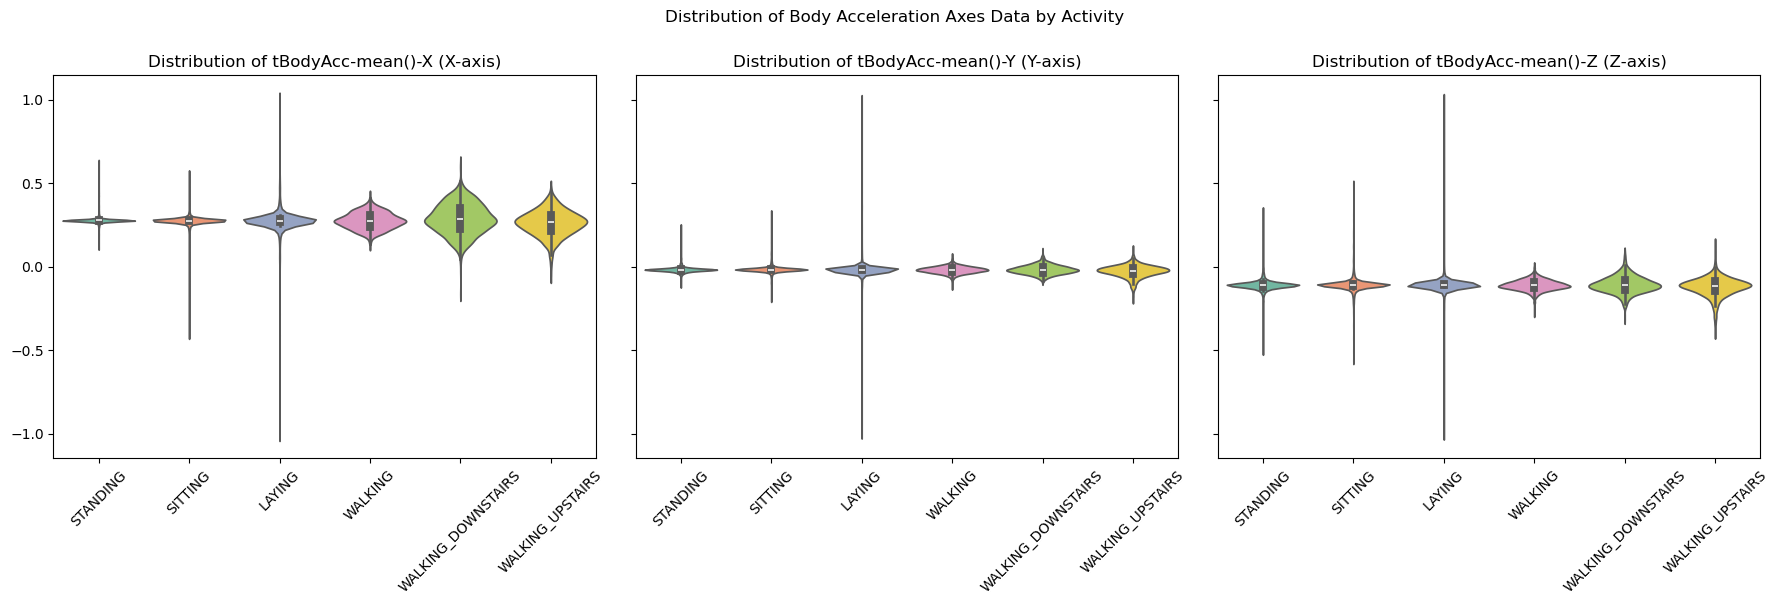

In [19]:
# Define the features to plot
features = ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z']
titles = ['X-axis', 'Y-axis', 'Z-axis']

# Create a figure with multiple subplots (3 for X, Y, and Z axes)
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Plot each feature as a violin plot on its corresponding subplot
for i, (ax, feature, title) in enumerate(zip(axes, features, titles)):
    sns.violinplot(
        data=full_df,
        x='ActivityName',  # Use ActivityName to group the data by activity
        y=feature,         # Plot the feature
        hue='ActivityName', # Color by ActivityName
        palette='Set2',  # Use a pre-defined color palette
        ax=ax,  # Use the specific subplot axis
        dodge=False  # No separation of violins, just one for each ActivityName
    )
    ax.set_title(f'Distribution of {feature} ({title})')
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.tick_params(axis='x', rotation=45)

# Adjust layout to prevent label cutoff and add a super title
plt.suptitle('Distribution of Body Acceleration Axes Data by Activity', y=1.0)

# Save the graph as a PNG
plt.savefig(
    'body-acceleration-violinplot.png',
    dpi=300,               # High resolution
    transparent=False,     # Transparent background
    bbox_inches='tight'   # Remove extra whitespace
)
# Adjust layout to prevent label cutoff
plt.tight_layout()
# Show the plot
plt.show()

## Body Rotation density distribution

This violin plot shows the density of the body rotation features

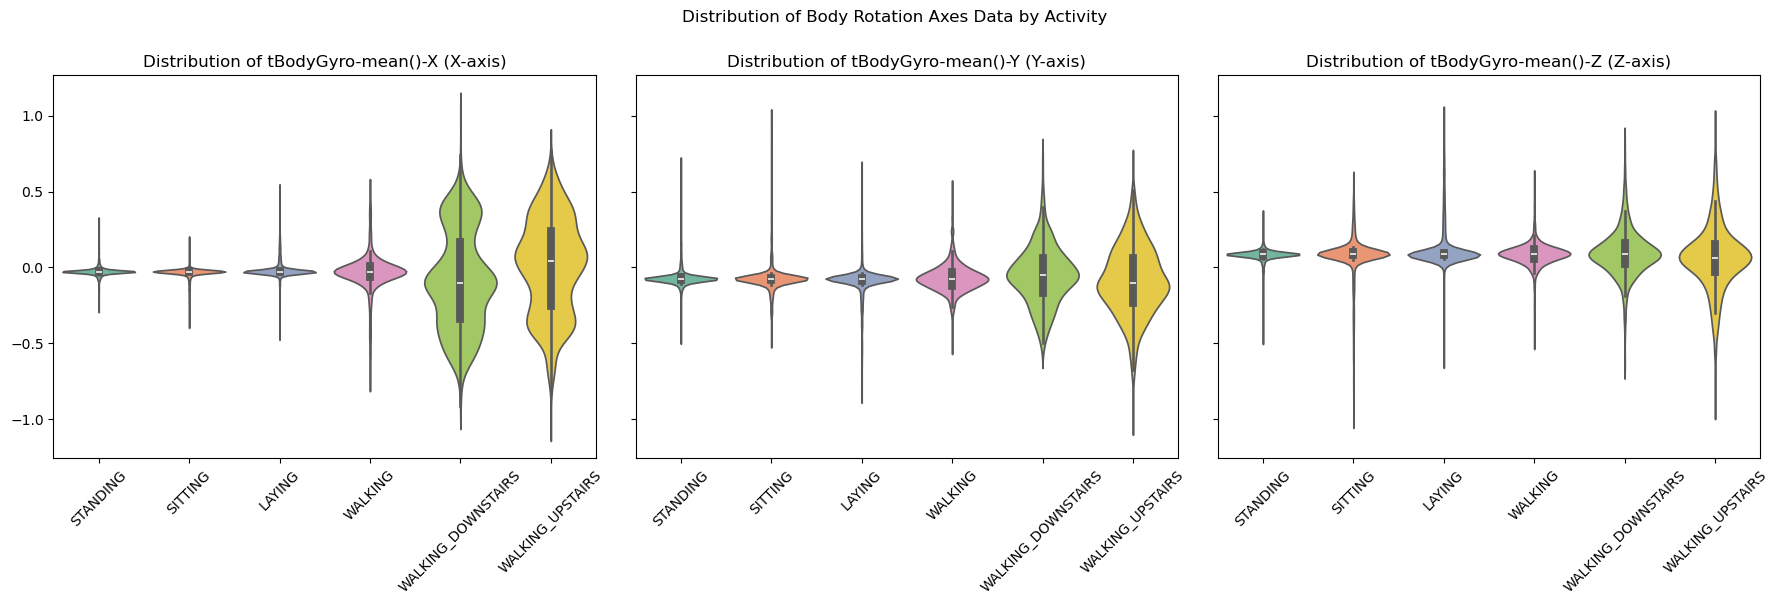

In [20]:
# Define the features to plot
features = ['tBodyGyro-mean()-X', 'tBodyGyro-mean()-Y', 'tBodyGyro-mean()-Z']
titles = ['X-axis', 'Y-axis', 'Z-axis']

# Create a figure with multiple subplots (3 for X, Y, and Z axes)
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Plot each feature as a violin plot on its corresponding subplot
for i, (ax, feature, title) in enumerate(zip(axes, features, titles)):
    sns.violinplot(
        data=full_df,
        x='ActivityName',  # Use ActivityName to group the data by activity
        y=feature,         # Plot the feature
        hue='ActivityName', # Color by ActivityName
        palette='Set2',  # Use a pre-defined color palette
        ax=ax,  # Use the specific subplot axis
        dodge=False  # No separation of violins, just one for each ActivityName
    )
    ax.set_title(f'Distribution of {feature} ({title})')
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.tick_params(axis='x', rotation=45)

# Adjust layout to prevent label cutoff and add a super title
plt.suptitle('Distribution of Body Rotation Axes Data by Activity', y=1.0)

# Save the graph as a PNG
plt.savefig(
    'body-rotation-violinplot.png',
    dpi=300,               # High resolution
    transparent=False,     # Transparent background
    bbox_inches='tight'   # Remove extra whitespace
)
# Adjust layout to prevent label cutoff
plt.tight_layout()
# Show the plot
plt.show()

# Strip Plots
---

## Body Acceleration Strip Plot

This shows a scatter-like plot of the values distributed by activity

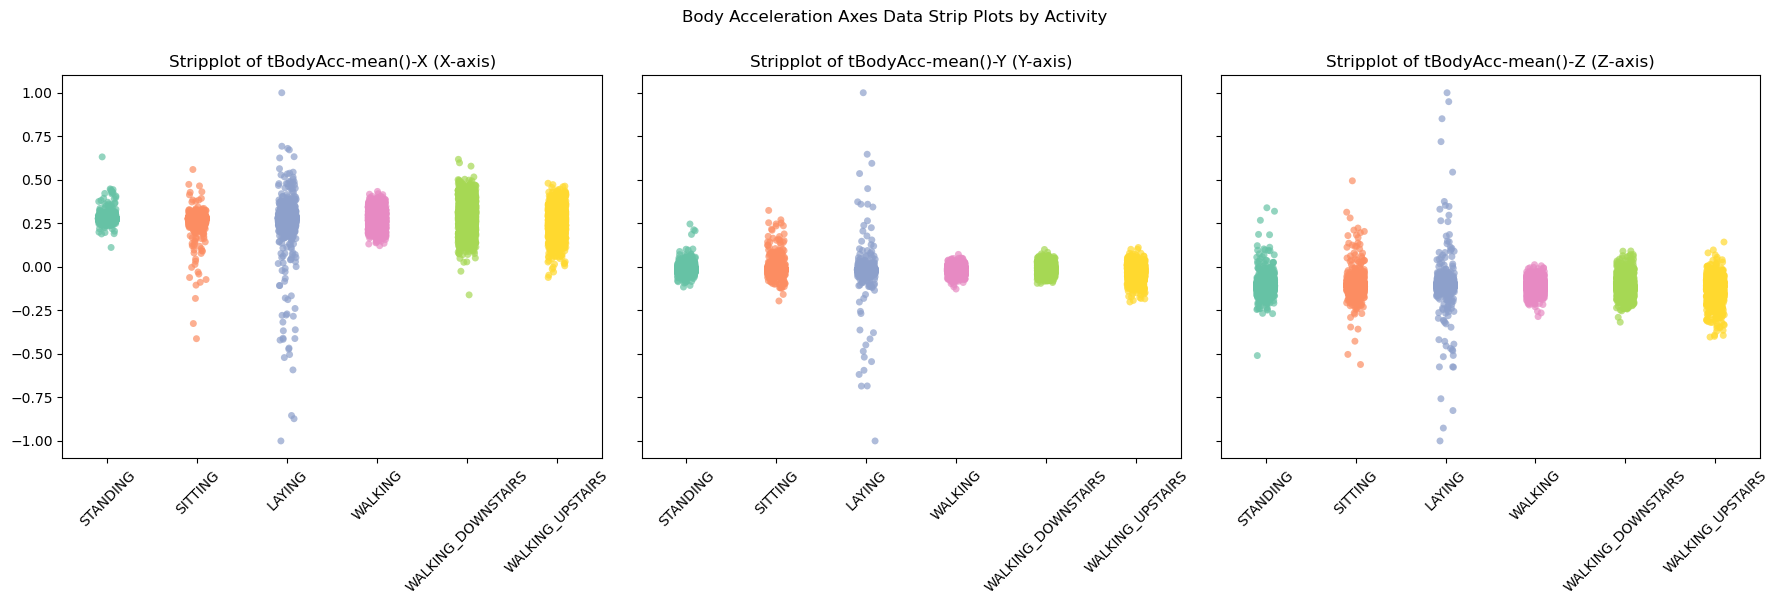

In [21]:
# Extract the features to plot
features = ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z']
titles = ['X-axis', 'Y-axis', 'Z-axis']

# Create a figure with multiple subplots (3 for X, Y, and Z axes)
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Plot each feature as a strip plot on its corresponding subplot
for i, (ax, feature, title) in enumerate(zip(axes, features, titles)):
    sns.stripplot(
        data=full_df,
        x='ActivityName',  # Group the data by activity
        y=feature,         # Plot the feature
        jitter=True,       # Add jitter to make the points clearer
        hue='ActivityName', # Color by ActivityName
        palette='Set2',    # Use a pre-defined color palette
        ax=ax,  # Use the specific subplot axis
        dodge=False,  # No separation of points, just one for each ActivityName
        marker='o',    # Choose the marker style
        alpha=0.7,     # Set transparency to help see overlapping points
    )
    ax.set_title(f'Stripplot of {feature} ({title})')
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.tick_params(axis='x', rotation=45)

# Adjust layout to prevent label cutoff and add a super title
plt.suptitle('Body Acceleration Axes Data Strip Plots by Activity', y=1.0)

# Save the graph as a PNG
plt.savefig(
    'body-acceleration-stripplot.png',
    dpi=300,               # High resolution
    transparent=False,     # Transparent background
    bbox_inches='tight'   # Remove extra whitespace
)
# Adjust layout to prevent label cutoff
plt.tight_layout()
# Show the plot
plt.show()

## Body Rotation Strip Plot

This shows a scatter-like plot of the values distributed by activity

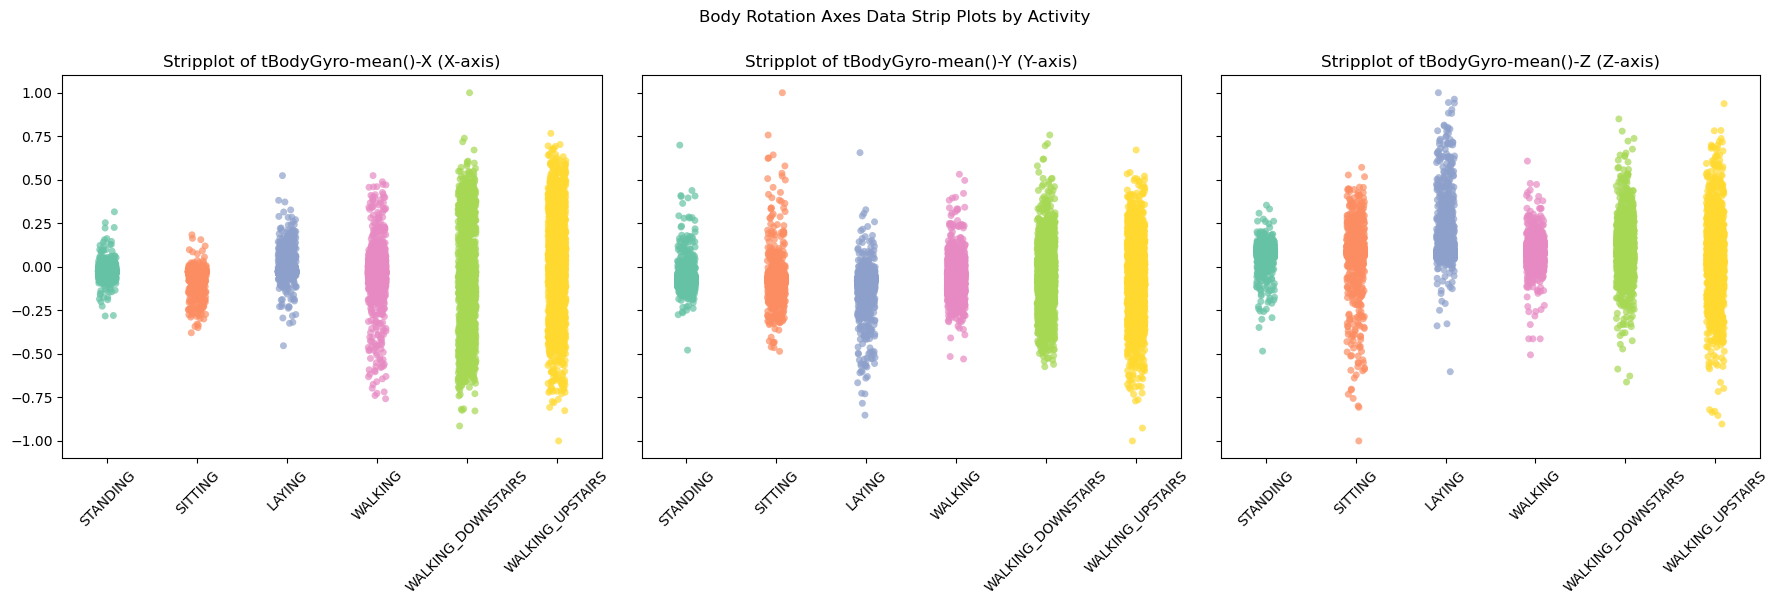

In [22]:
# Extract the features to plot
features = ['tBodyGyro-mean()-X', 'tBodyGyro-mean()-Y', 'tBodyGyro-mean()-Z']
titles = ['X-axis', 'Y-axis', 'Z-axis']

# Create a figure with multiple subplots (3 for X, Y, and Z axes)
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Plot each feature as a strip plot on its corresponding subplot
for i, (ax, feature, title) in enumerate(zip(axes, features, titles)):
    sns.stripplot(
        data=full_df,
        x='ActivityName',  # Group the data by activity
        y=feature,         # Plot the feature
        jitter=True,       # Add jitter to make the points clearer
        hue='ActivityName', # Color by ActivityName
        palette='Set2',    # Use a pre-defined color palette
        ax=ax,  # Use the specific subplot axis
        dodge=False,  # No separation of points, just one for each ActivityName
        marker='o',    # Choose the marker style
        alpha=0.7,     # Set transparency to help see overlapping points
    )
    ax.set_title(f'Stripplot of {feature} ({title})')
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.tick_params(axis='x', rotation=45)

# Adjust layout to prevent label cutoff and add a super title
plt.suptitle('Body Rotation Axes Data Strip Plots by Activity', y=1.0)

# Save the graph as a PNG
plt.savefig(
    'body-rotation-stripplot.png',
    dpi=300,               # High resolution
    transparent=False,     # Transparent background
    bbox_inches='tight'   # Remove extra whitespace
)
# Adjust layout to prevent label cutoff
plt.tight_layout()
# Show the plot
plt.show()

# Joint Plots
---

## Body Acceleration Joint Plot

This shows a scatter-like plot of the values distributed by activity, as well as a linear distribution

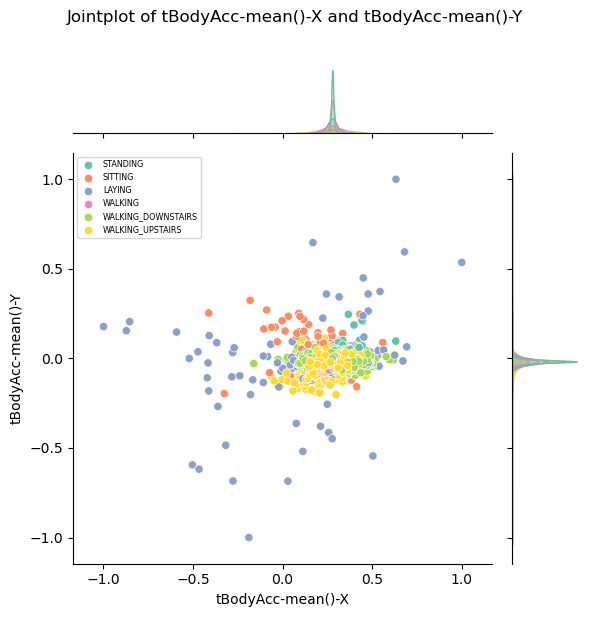

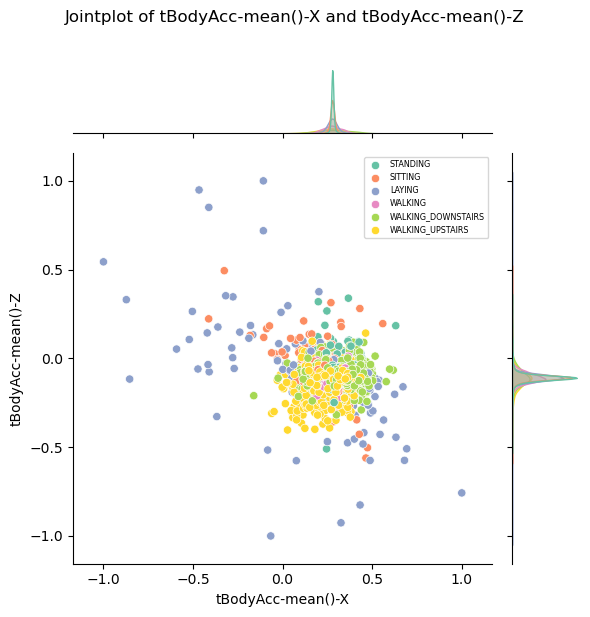

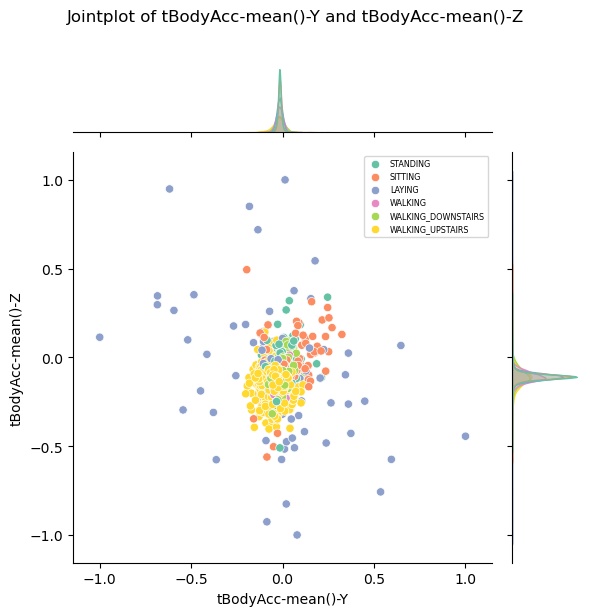

In [23]:
# Create the first jointplot for (X, Y)
g1 = sns.jointplot(
    data=full_df,
    x='tBodyAcc-mean()-X', 
    y='tBodyAcc-mean()-Y',
    hue='ActivityName',
    kind='scatter',
    palette='Set2'
)
g1.fig.suptitle('Jointplot of tBodyAcc-mean()-X and tBodyAcc-mean()-Y', y=1.02)
g1.fig.tight_layout()
g1.ax_joint.legend(fontsize='xx-small') # Shrink the legend size
# Save the graph as a PNG
g1.fig.savefig(
    'body-acceleration-jointplot-1.png',
    dpi=300,               # High resolution
    transparent=False,     # Transparent background
    bbox_inches='tight'   # Remove extra whitespace
)

# Create the second jointplot for (X, Z)
g2 = sns.jointplot(
    data=full_df,
    x='tBodyAcc-mean()-X',
    y='tBodyAcc-mean()-Z',
    hue='ActivityName',
    kind='scatter',
    palette='Set2'
)
g2.fig.suptitle('Jointplot of tBodyAcc-mean()-X and tBodyAcc-mean()-Z', y=1.02)
g2.fig.tight_layout()
g2.ax_joint.legend(fontsize='xx-small') # Shrink the legend size
# Save the graph as a PNG
g2.fig.savefig(
    'body-acceleration-jointplot-2.png',
    dpi=300,               # High resolution
    transparent=False,     # Transparent background
    bbox_inches='tight'   # Remove extra whitespace
)

# Create the third jointplot for (Y, Z)
g3 = sns.jointplot(
    data=full_df,
    x='tBodyAcc-mean()-Y',
    y='tBodyAcc-mean()-Z',
    hue='ActivityName',
    kind='scatter',
    palette='Set2'
)
g3.fig.suptitle('Jointplot of tBodyAcc-mean()-Y and tBodyAcc-mean()-Z', y=1.02)
g3.fig.tight_layout()
g3.ax_joint.legend(fontsize='xx-small') # Shrink the legend size
# Save the graph as a PNG
g3.fig.savefig(
    'body-acceleration-jointplot-3.png',
    dpi=300,               # High resolution
    transparent=False,     # Transparent background
    bbox_inches='tight'   # Remove extra whitespace
)
# Adjust layout to prevent label cutoff
plt.tight_layout()
# Display the plots
plt.show()

## Body Rotation Joint Plot

This shows a scatter-like plot of the values distributed by activity, as well as a linear distribution

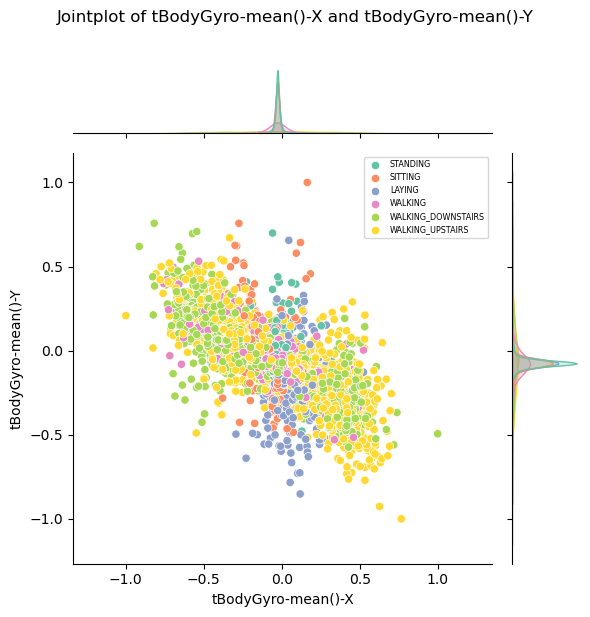

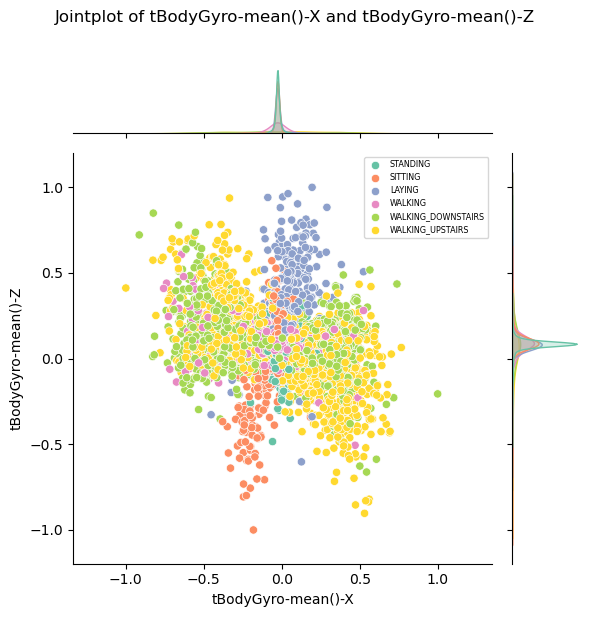

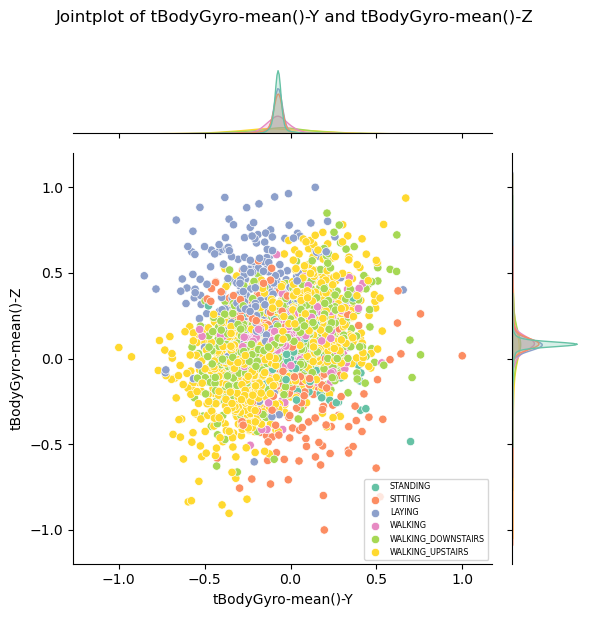

In [24]:
# Create the first jointplot for (X, Y)
g1 = sns.jointplot(
    data=full_df,
    x='tBodyGyro-mean()-X', 
    y='tBodyGyro-mean()-Y',
    hue='ActivityName',
    kind='scatter',
    palette='Set2'
)
g1.fig.suptitle('Jointplot of tBodyGyro-mean()-X and tBodyGyro-mean()-Y', y=1.02)
g1.fig.tight_layout()
g1.ax_joint.legend(fontsize='xx-small') # Shrink the legend size
# Save the graph as a PNG
g1.fig.savefig(
    'body-rotation-jointplot-1.png',
    dpi=300,               # High resolution
    transparent=False,     # Transparent background
    bbox_inches='tight'   # Remove extra whitespace
)

# Create the second jointplot for (X, Z)
g2 = sns.jointplot(
    data=full_df,
    x='tBodyGyro-mean()-X',
    y='tBodyGyro-mean()-Z',
    hue='ActivityName',
    kind='scatter',
    palette='Set2'
)
g2.fig.suptitle('Jointplot of tBodyGyro-mean()-X and tBodyGyro-mean()-Z', y=1.02)
g2.fig.tight_layout()
g2.ax_joint.legend(fontsize='xx-small') # Shrink the legend size
# Save the graph as a PNG
g2.fig.savefig(
    'body-rotation-jointplot-2.png',
    dpi=300,               # High resolution
    transparent=False,     # Transparent background
    bbox_inches='tight'   # Remove extra whitespace
)

# Create the third jointplot for (Y, Z)
g3 = sns.jointplot(
    data=full_df,
    x='tBodyGyro-mean()-Y',
    y='tBodyGyro-mean()-Z',
    hue='ActivityName',
    kind='scatter',
    palette='Set2'
)
g3.fig.suptitle('Jointplot of tBodyGyro-mean()-Y and tBodyGyro-mean()-Z', y=1.02)
g3.fig.tight_layout()
g3.ax_joint.legend(fontsize='xx-small') # Shrink the legend size
# Save the graph as a PNG
g3.fig.savefig(
    'body-rotation-jointplot-3.png',
    dpi=300,               # High resolution
    transparent=False,     # Transparent background
    bbox_inches='tight'   # Remove extra whitespace
)
# Adjust layout to prevent label cutoff
plt.tight_layout()
# Display the plots
plt.show()